In [4]:
import numpy as np
import glob
import pandas as pd
from matplotlib import pyplot as plt
import re
from scipy.special import expi
from scipy.stats import binom
from numpy.random import poisson

In [5]:
files_time50k_comb_mu9_gaus = glob.glob('../results/*/*mu1e-09*/*time50000*gaus*all.p')
files_time50k_comb_mu9_zeros_gaus = glob.glob('../results/*/*mu1e-09*/*time50000*gaus*all.zero')

In [6]:
files_time50k_comb_mu9_unif = glob.glob('../results/*/*mu1e-09*/*time50000*unif*all.p')
files_time50k_comb_mu9_zeros_unif = glob.glob('../results/*/*mu1e-09*/*time50000*unif*all.zero')

## Compare moments in simulation vs. theory

In [24]:
N = 10000**2
mu = 1e-9
prefix = "../results/uniform/s{s}_mu{mu}/s{s}_mu{mu}_rho1_L10000_sigma10_time50000.0_r0.1_uniform_all"
marker_shapes = ["^",'+','x']
def plot_moments_unif(files_p,filies_zero,title):
    fig,ax = plt.subplots(1,2,figsize=(20,10))
    for j,s in enumerate([0.1, 0.01, 0.001]):
        pfile = prefix.format(mu=mu,s=s)+'.p'
        zfile = prefix.format(mu=mu,s=s)+'.zero'
        ps = np.loadtxt(pfile)
        zeros = np.loadtxt(zfile)
        n_samples = np.arange(1, len(ps) + 1)
        n_zeros = zeros * n_samples / n_samples[-1]
        mean_sim = np.cumsum(ps) / (n_samples + n_zeros)
        secondmom_sim = np.cumsum(ps**2) / (n_samples + n_zeros)
        theory_EP = mu/s
        theory_EP2 = mu / s**2 * (mu + 1 / N)
        ax[0].scatter(theory_EP,mean_sim[-1],marker=marker_shapes[j],label=f"s={s}",s=200,color='blue')
        ax[1].scatter(theory_EP2,secondmom_sim[-1],marker=marker_shapes[j],label=f"s={s}",s=200,color='blue')

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].plot(np.logspace(-8,-6),np.logspace(-8,-6),color='black')
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].plot(np.logspace(-15,-11),np.logspace(-15,-11),color='black')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(r"$\mathbb{E}[P]$")
    ax[1].set_title(r"$\mathbb{E}[P^2]$")
    ax[0].set_xlabel("theory")
    ax[1].set_xlabel("theory")
    ax[0].set_ylabel('sim')
    ax[1].set_ylabel('sim')
    plt.suptitle(title)
    plt.show()

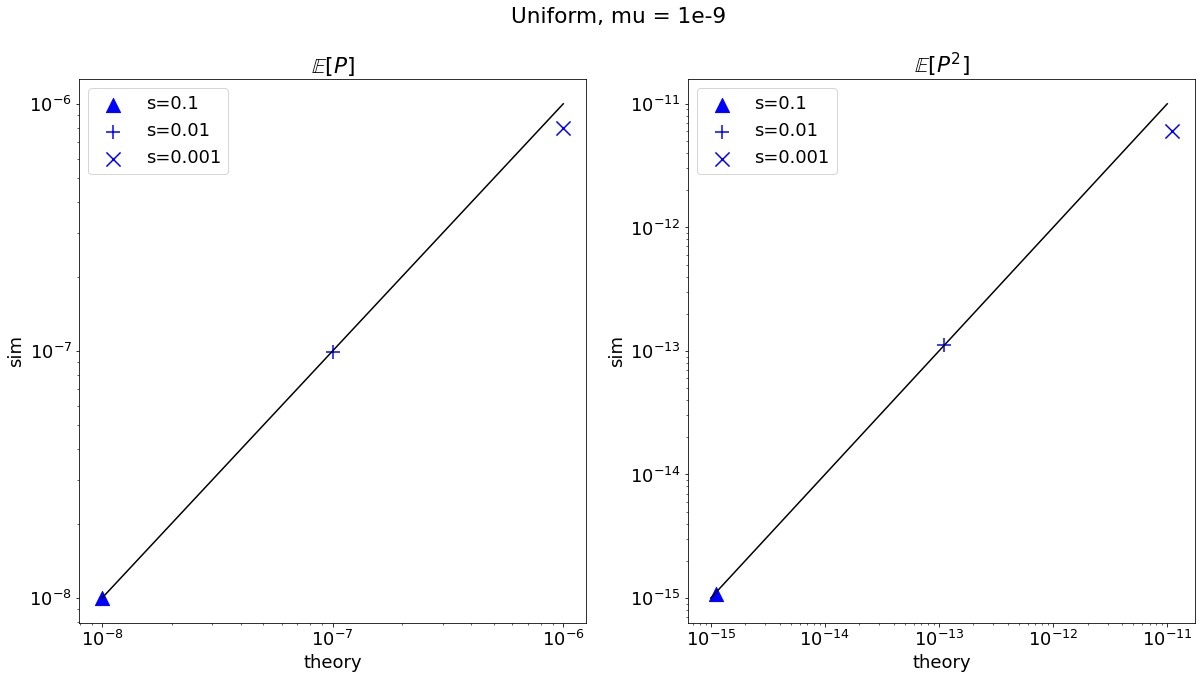

In [25]:
plt.rcParams.update({'font.size': 18})
plot_moments_unif(files_time50k_comb_mu9_unif,files_time50k_comb_mu9_zeros_unif,"Uniform, mu = 1e-9")

In [14]:
files_time50k_comb_mu9_gaus

['../results/gaussian_w10/s0.01_mu1e-09/s0.01_mu1e-09_rho1_L10000_sigma10_time50000.0_r0.1_gaussian_w10_all.p',
 '../results/gaussian_w10/s0.001_mu1e-09/s0.001_mu1e-09_rho1_L10000_sigma10_time50000.0_r0.1_gaussian_w10_all.p',
 '../results/gaussian_w10/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma10_time50000.0_r0.1_gaussian_w10_all.p',
 '../results/gaussian_w100/s0.01_mu1e-09/s0.01_mu1e-09_rho1_L10000_sigma10_time50000.0_r0.1_gaussian_w100_all.p',
 '../results/gaussian_w100/s0.001_mu1e-09/s0.001_mu1e-09_rho1_L10000_sigma10_time50000.0_r0.1_gaussian_w100_all.p',
 '../results/gaussian_w100/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma10_time50000.0_r0.1_gaussian_w100_all.p']

In [37]:
prefix = "../results/gaussian_w{w}/s{s}_mu{mu}/s{s}_mu{mu}_rho1_L10000_sigma10_time50000.0_r0.1_gaussian_w{w}_all"
marker_shapes = ["^",'+','x']


def get_lc_squared(sigma,s):
    return sigma**2/s

def get_EPsquared(mu,s,rho,sigma,u2):
    return (mu/s)**2 +((2*mu)/((s**2)*rho*get_lc_squared(sigma,s)))*u2

def u2_exact(w):
    return (-1*np.exp(np.float128(w**2)/(4*np.pi**2))/(8*np.pi))*expi(-1*w**2/(4*np.pi**2))

def plot_moments_gaussian(files_p,filies_zero,title,w_vals = [10,100]):
    fig,ax = plt.subplots(1,2,figsize=(20,10))
    colors = ['red','blue','green']
    color_dict = dict(zip(w_vals,colors))
    for j,s in enumerate([0.1, 0.01, 0.001]):
        for w in w_vals:
            if 'gaussian_w'+str(w) in prefix.format(mu=mu,s=s,w=w): 
                pfile = prefix.format(mu=mu,s=s,w=w)+'.p'
                zfile = prefix.format(mu=mu,s=s,w=w)+'.zero'
                ps = np.loadtxt(pfile)
                zeros = np.loadtxt(zfile)
                n_samples = np.arange(1, len(ps) + 1)
                n_zeros = zeros * n_samples / n_samples[-1]
                mean_sim = np.cumsum(ps) / (n_samples + n_zeros)
                secondmom_sim = np.cumsum(ps**2) / (n_samples + n_zeros)
                theory_EP = mu/s
                sigma = 10
                rho = 1
                w_tilde = w/np.sqrt(get_lc_squared(sigma,s))
                theory_u2 = u2_exact(w_tilde)
                theory_EP2 = get_EPsquared(mu,s,rho,sigma,theory_u2)
                ax[0].scatter(theory_EP,mean_sim[-1],marker=marker_shapes[j],label=f"s={s}, w={w}",s=200,color=color_dict[w])
                ax[1].scatter(theory_EP2,secondmom_sim[-1],marker=marker_shapes[j],label=f"s={s}, w={w}",s=200,color=color_dict[w])

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].plot(np.logspace(-8,-6),np.logspace(-8,-6),color='black')
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].plot(np.logspace(-11,-8),np.logspace(-11,-8),color='black')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(r"$\mathbb{E}[P]$")
    ax[1].set_title(r"$\mathbb{E}[P^2]$")
    ax[0].set_xlabel("theory")
    ax[1].set_xlabel("theory")
    ax[0].set_ylabel('sim')
    ax[1].set_ylabel('sim')
    plt.suptitle(title)
    plt.show()

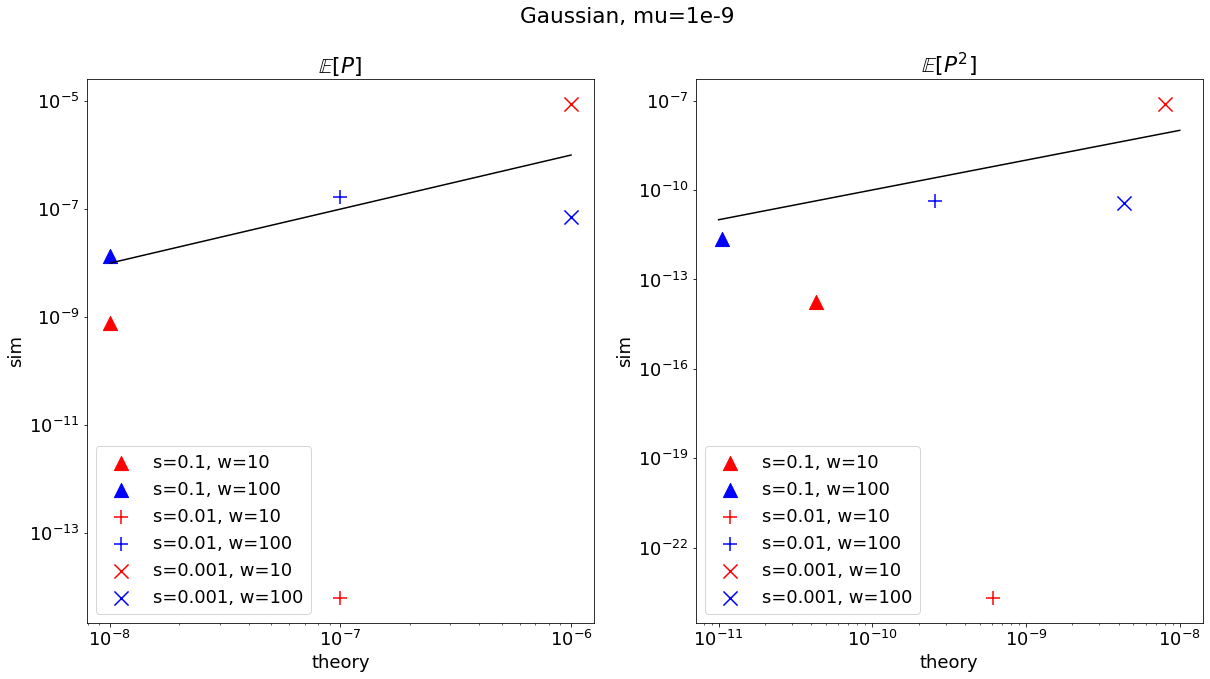

In [38]:
plot_moments_gaussian(files_time50k_comb_mu9_gaus,files_time50k_comb_mu9_zeros_gaus,"Gaussian, mu=1e-9")

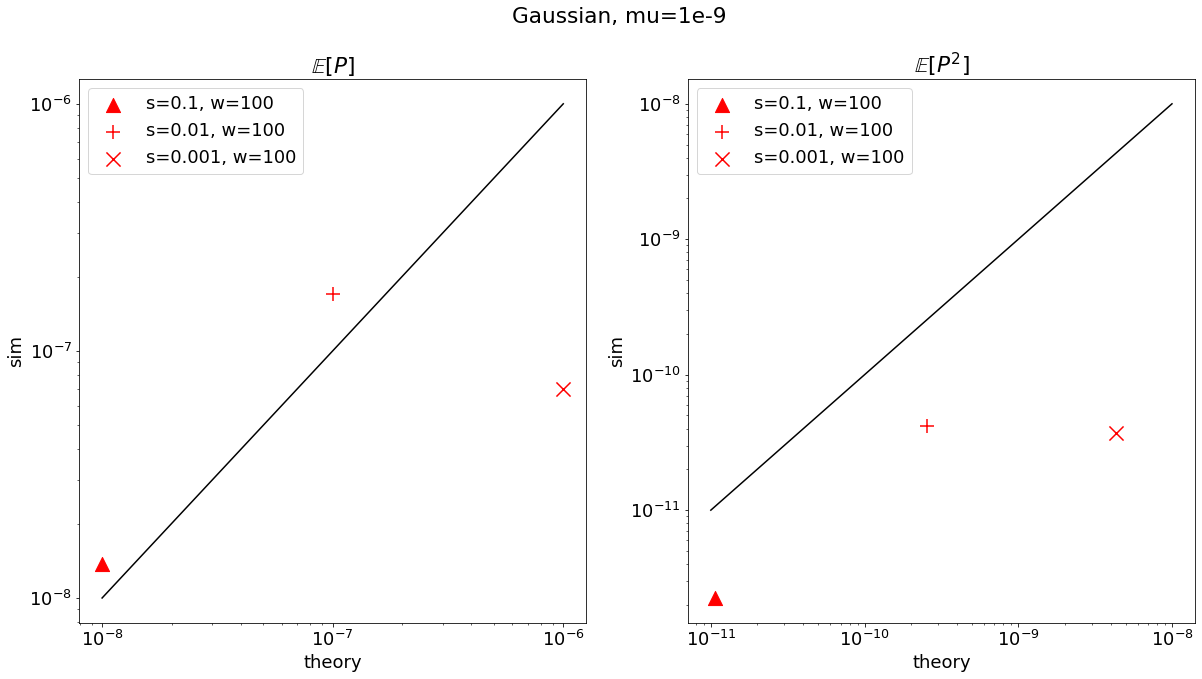

In [39]:
plot_moments_gaussian(files_time50k_comb_mu9_gaus,files_time50k_comb_mu9_zeros_gaus,"Gaussian, mu=1e-9",w_vals=[100])

## Plot time course of moments

### Uniform

N mu = 0.1
s = 0.1
mu / s = 1e-08
E[P] = [4.40421090e-08 4.40289869e-08 4.40158726e-08 ... 1.00137117e-08
 1.00130332e-08 1.00123548e-08]


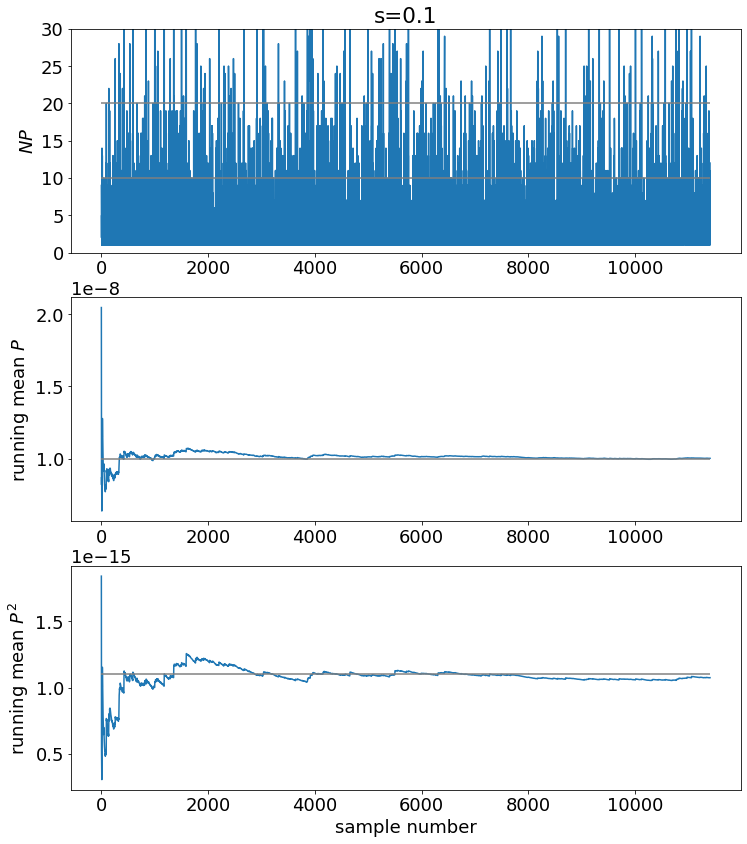

s = 0.01
mu / s = 1.0000000000000001e-07
E[P] = [2.66554449e-07 2.66530054e-07 2.66505664e-07 ... 9.89039513e-08
 9.89005926e-08 9.88972341e-08]


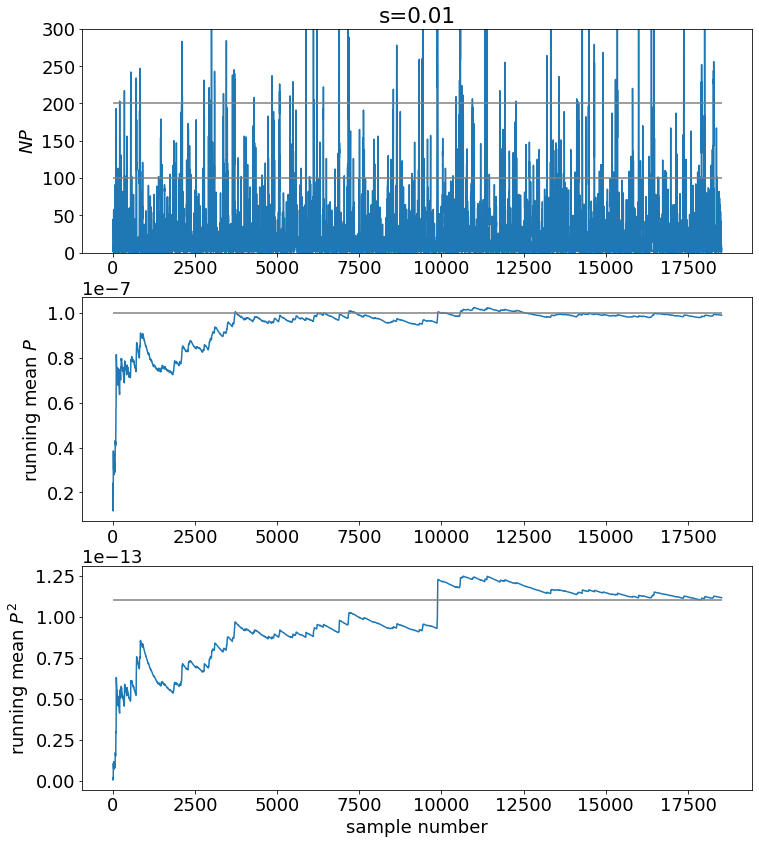

s = 0.001
mu / s = 1e-06
E[P] = [1.63288769e-06 1.63281825e-06 1.63274881e-06 ... 7.98982719e-07
 7.98966092e-07 7.98949467e-07]


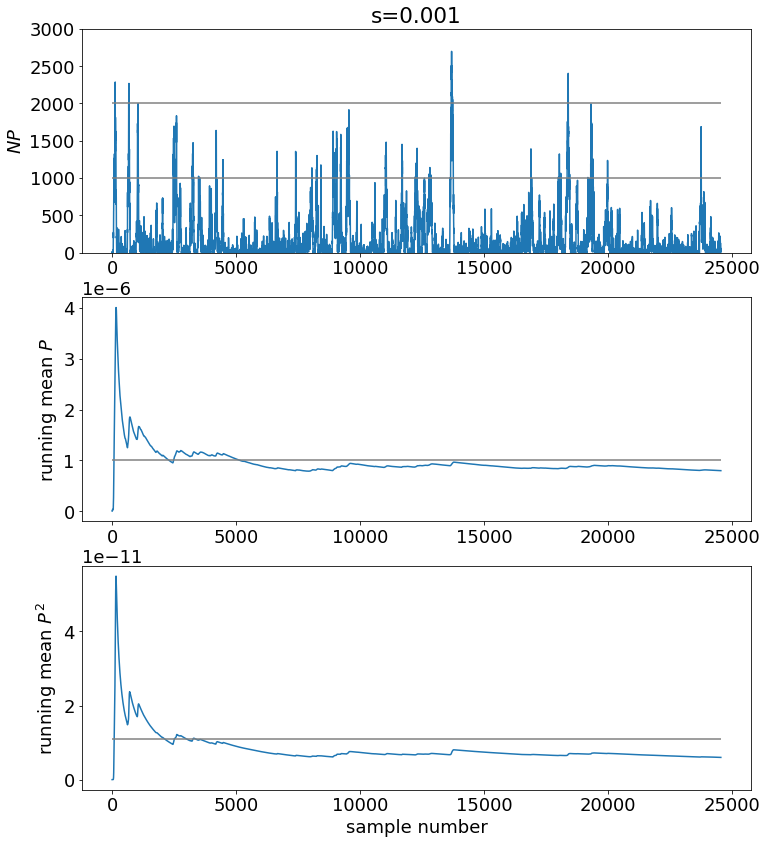

In [42]:
# Uniform

L = 10000
rho = 1
N = rho * L**2
mu = 1e-9
print(f"N mu = {N * mu}")
prefix = "../results/uniform/s{s}_mu{mu}/s{s}_mu{mu}_rho{rho}_L{L}_sigma10_time50000.0_r0.1_uniform_{rep}"

for s in [0.1, 0.01, 0.001]:
    for rep in ["all"]:#[f"rep{i}" for i in range(10)] + ["all"]:
        pfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep) + ".p"
        zfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep) + ".zero"

        ps = np.loadtxt(pfile)
        zeros = np.loadtxt(zfile)
        n_samples = np.arange(1, len(ps) + 1)
        n_zeros = zeros * n_samples / n_samples[-1]

        if rep == "all":
            print(f"s = {s}")
            print(f"mu / s = {mu / s}")
            print(f"E[P] = {np.sum(ps) / (len(ps) + n_zeros)}")

        plt.figure(figsize=(12,14))
        plt.subplot(311)
        plt.plot(N*ps)
        plt.hlines([1 / s, 2 / s], 0, len(ps), color="0.5")
        plt.ylabel("$NP$")
        plt.ylim([0, 3/s])
        plt.title(f"s={s}")
        plt.subplot(312)
        plt.plot(np.cumsum(ps) / (n_samples + n_zeros))
        plt.hlines(mu / s, 0, n_samples[-1], color="0.5")
        plt.ylabel("running mean $P$")
        plt.subplot(313)
        plt.plot(np.cumsum(ps**2) / (n_samples + n_zeros))
        plt.hlines(mu / s**2 * (mu + 1 / N), 0, n_samples[-1], color="0.5")
        plt.ylabel("running mean $P^2$")
        plt.xlabel("sample number")
        plt.show()
#         plt.savefig(f"example_plots/example_s{s}_{rep}.png")
#         plt.close()

### Gaussian

N mu = 0.1
s = 0.1
mu / s = 1e-08
E[P] = [3.41069076e-09 3.40967158e-09 3.40865301e-09 ... 7.76196283e-10
 7.76143486e-10 7.76090696e-10]


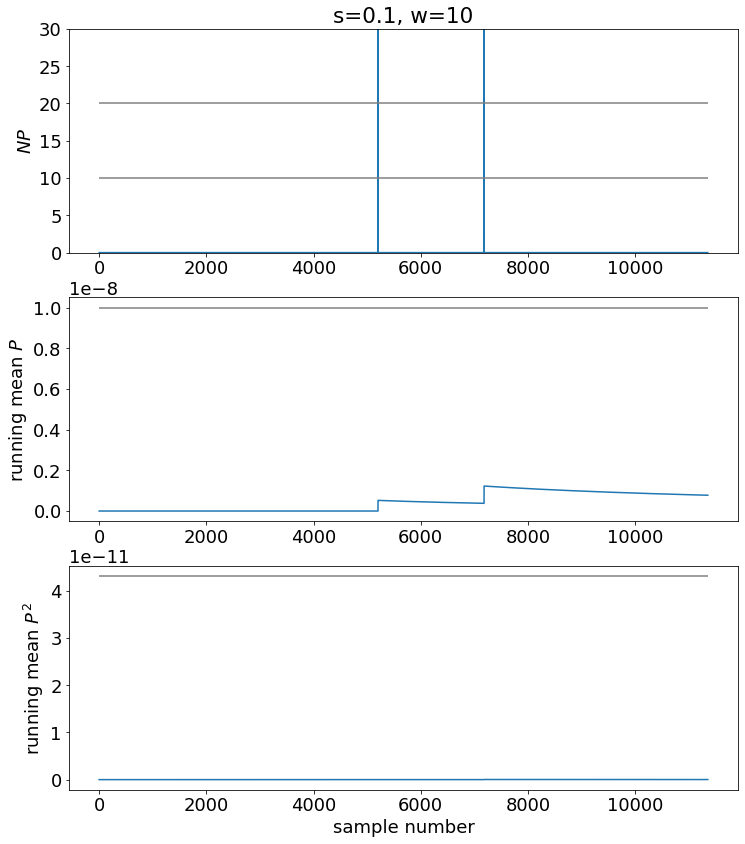

s = 0.1
mu / s = 1e-08
E[P] = [6.19452824e-08 6.19256386e-08 6.19060072e-08 ... 1.37206137e-08
 1.37196497e-08 1.37186859e-08]


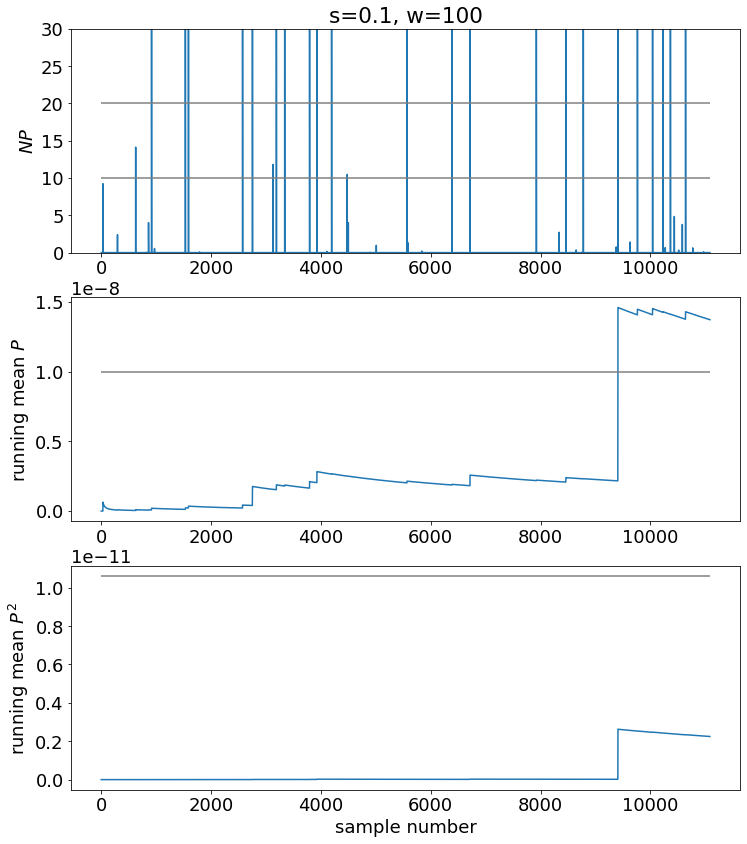

s = 0.01
mu / s = 1.0000000000000001e-07
E[P] = [1.71100837e-14 1.71085395e-14 1.71069957e-14 ... 6.36377247e-15
 6.36355885e-15 6.36334525e-15]


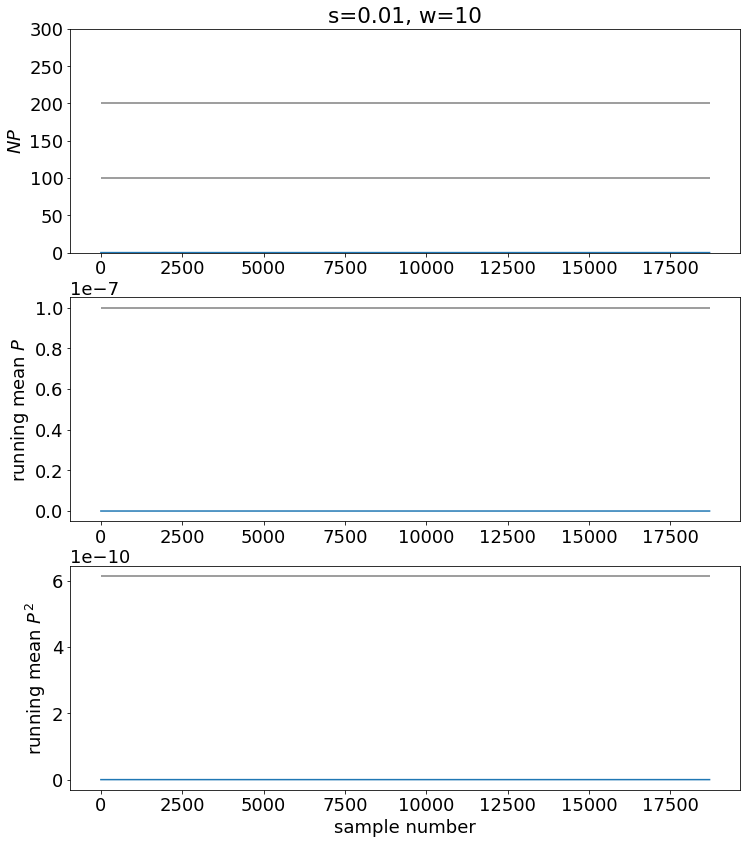

s = 0.01
mu / s = 1.0000000000000001e-07
E[P] = [4.52165734e-07 4.52125262e-07 4.52084798e-07 ... 1.69482987e-07
 1.69477301e-07 1.69471615e-07]


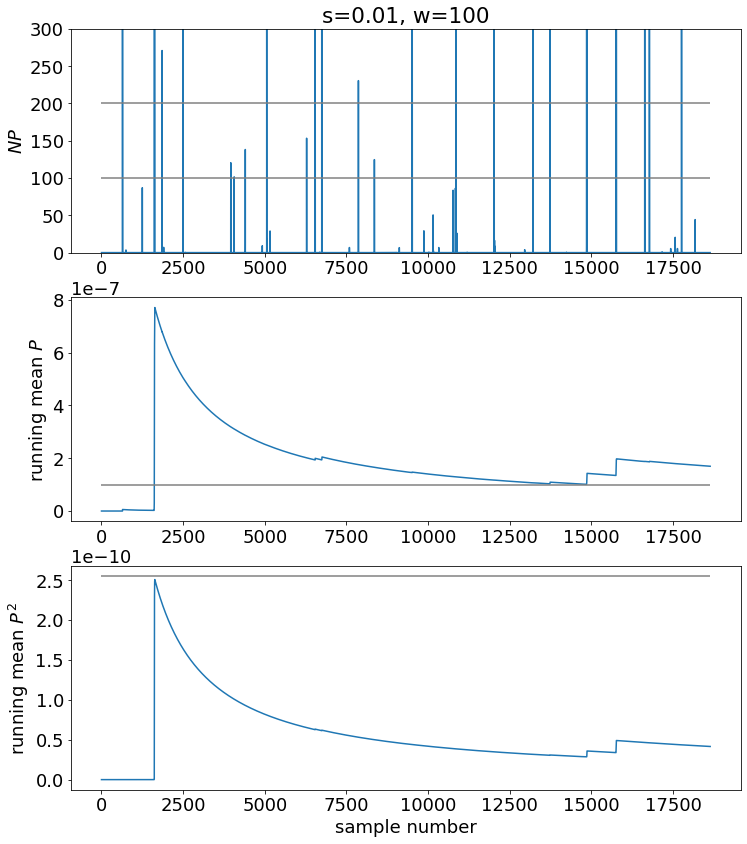

s = 0.001
mu / s = 1e-06
E[P] = [1.75501956e-05 1.75495141e-05 1.75488327e-05 ... 8.87647593e-06
 8.87630161e-06 8.87612729e-06]


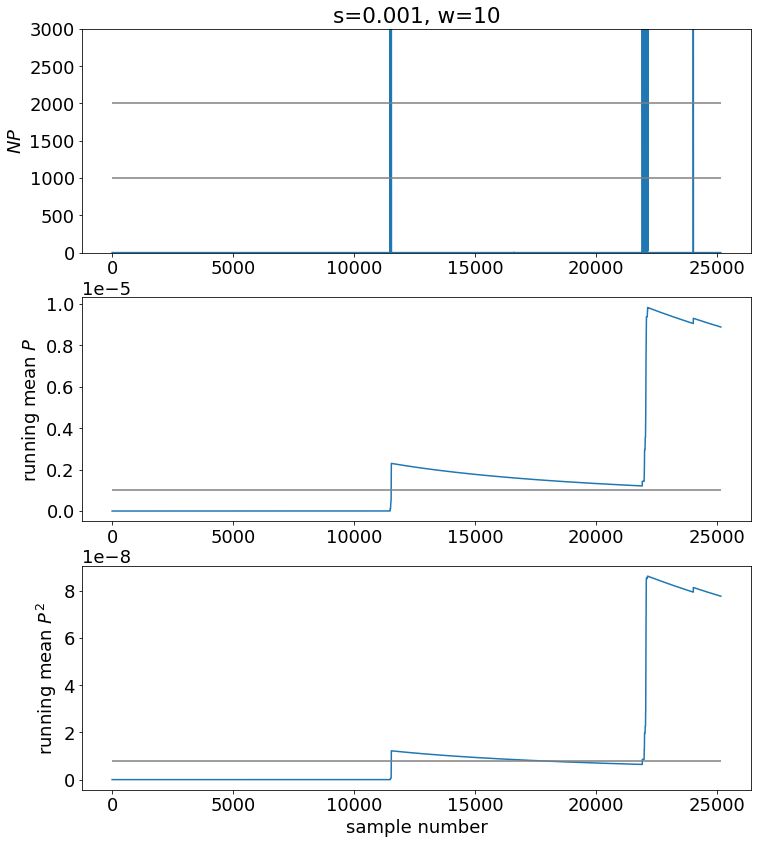

s = 0.001
mu / s = 1e-06
E[P] = [1.52726225e-07 1.52718475e-07 1.52710726e-07 ... 7.04420030e-08
 7.04403542e-08 7.04387055e-08]


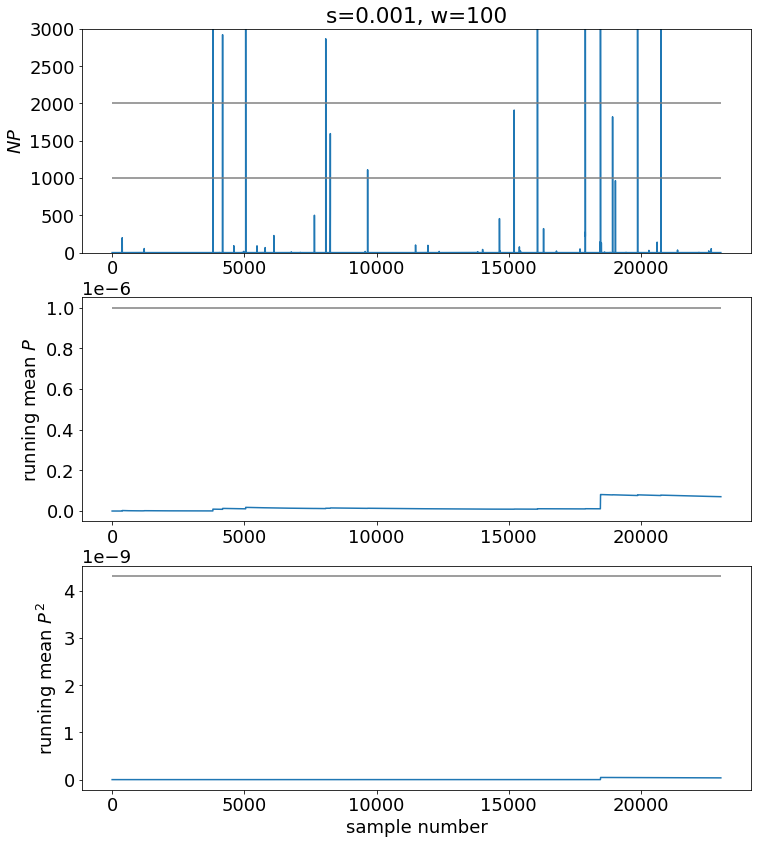

In [45]:
## Gaussian (all)

# Uniform

L = 10000
rho = 1
N = rho * L**2
mu = 1e-9
print(f"N mu = {N * mu}")
prefix = "../results/gaussian_w{w}/s{s}_mu{mu}/s{s}_mu{mu}_rho{rho}_L{L}_sigma10_time50000.0_r0.1_gaussian_w{w}_{rep}"
w_vals = [10,100]
for s in [0.1, 0.01, 0.001]:
    for rep in ["all"]:#[f"rep{i}" for i in range(10)] + ["all"]:
        for w in w_vals:
            pfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep, w=w) + ".p"
            zfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep, w=w) + ".zero"

            ps = np.loadtxt(pfile)
            zeros = np.loadtxt(zfile)
            n_samples = np.arange(1, len(ps) + 1)
            n_zeros = zeros * n_samples / n_samples[-1]

            if rep == "all":
                print(f"s = {s}")
                print(f"mu / s = {mu / s}")
                print(f"E[P] = {np.sum(ps) / (len(ps) + n_zeros)}")

            plt.figure(figsize=(12,14))
            plt.subplot(311)
            plt.plot(N*ps)
            plt.hlines([1 / s, 2 / s], 0, len(ps), color="0.5")
            plt.ylabel("$NP$")
            plt.ylim([0, 3/s])
            plt.title(f"s={s}, w={w}")
            plt.subplot(312)
            plt.plot(np.cumsum(ps) / (n_samples + n_zeros))
            plt.hlines(mu / s, 0, n_samples[-1], color="0.5")
            plt.ylabel("running mean $P$")
            plt.subplot(313)
            plt.plot(np.cumsum(ps**2) / (n_samples + n_zeros))
            
            sigma = 10
            rho = 1
            w_tilde = w/np.sqrt(get_lc_squared(sigma,s))
            theory_u2 = u2_exact(w_tilde)
            theory_EP2 = get_EPsquared(mu,s,rho,sigma,theory_u2)
            plt.hlines(theory_EP2, 0, n_samples[-1], color="0.5")
            plt.ylabel("running mean $P^2$")
            plt.xlabel("sample number")
            plt.show()
#         plt.savefig(f"example_plots/example_s{s}_{rep}.png")
#         plt.close()

N mu = 0.1


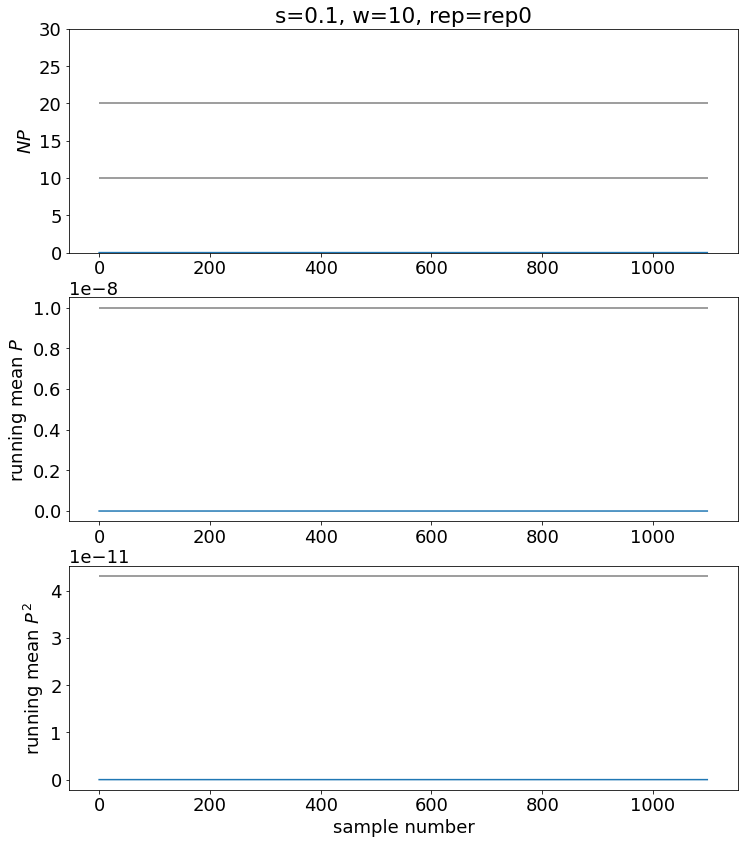

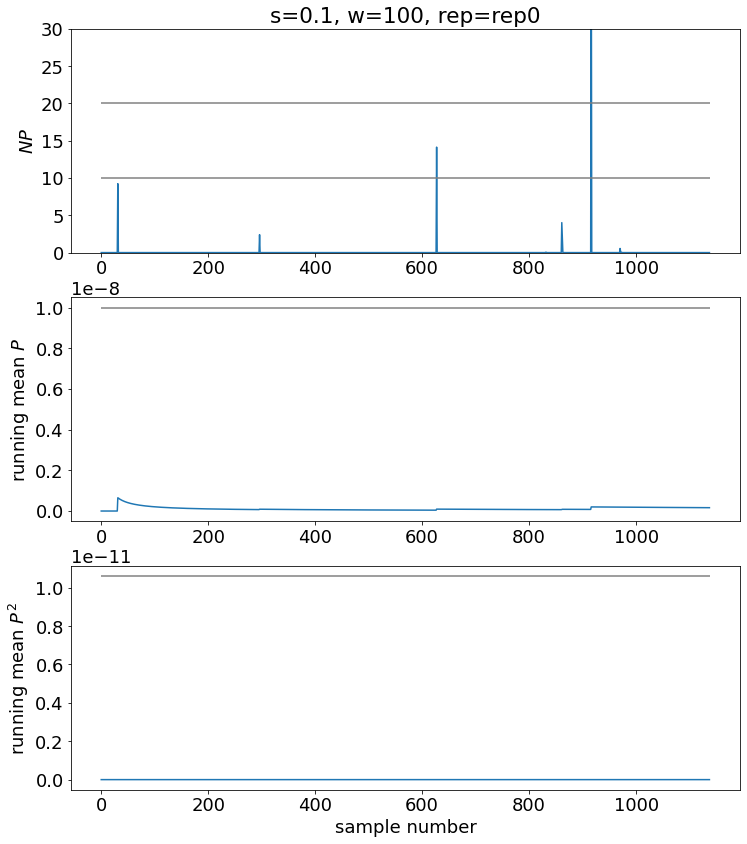

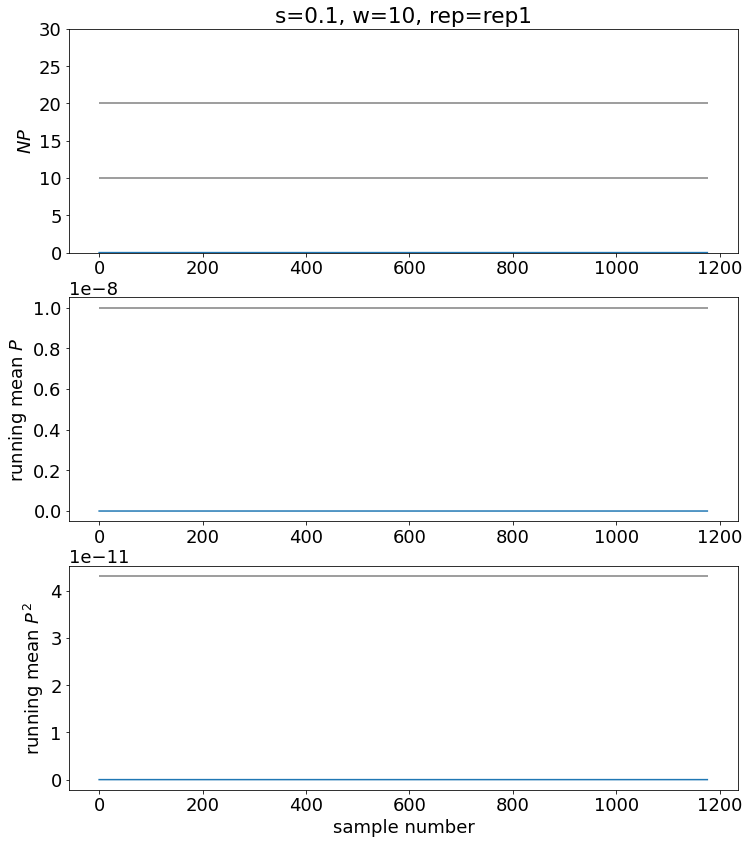

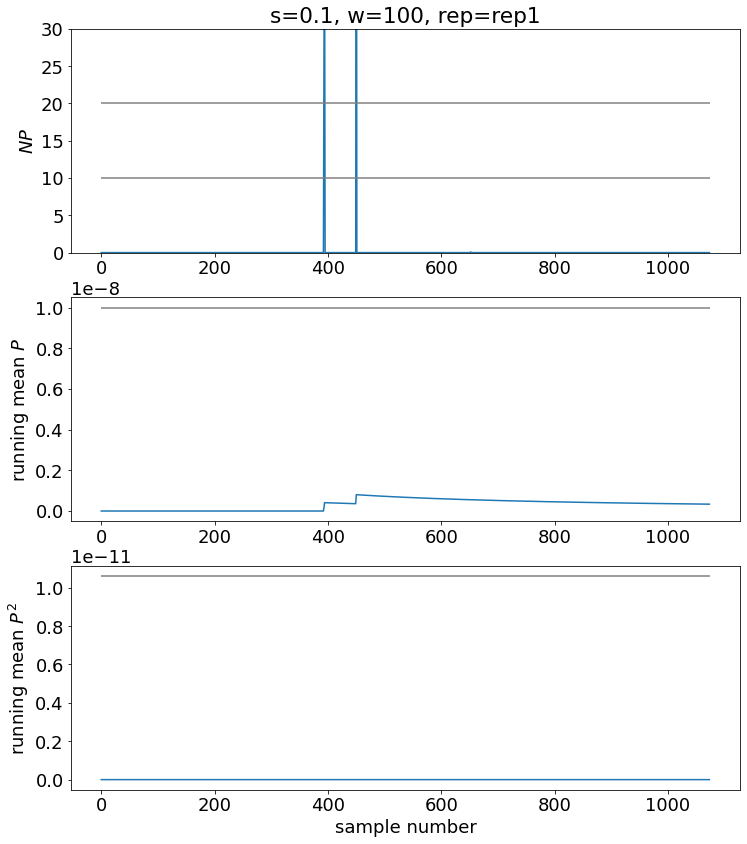

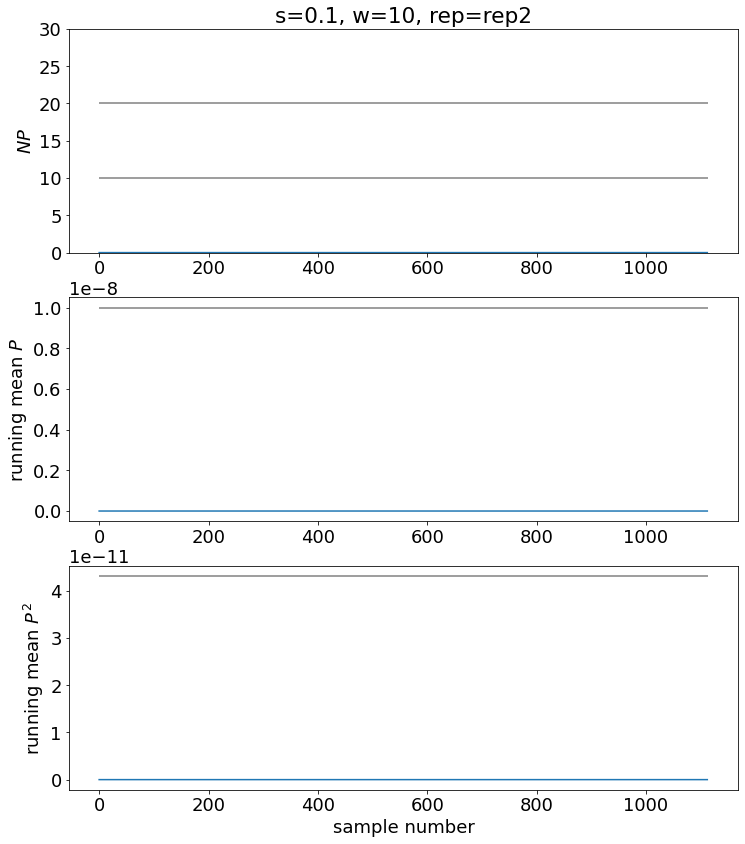

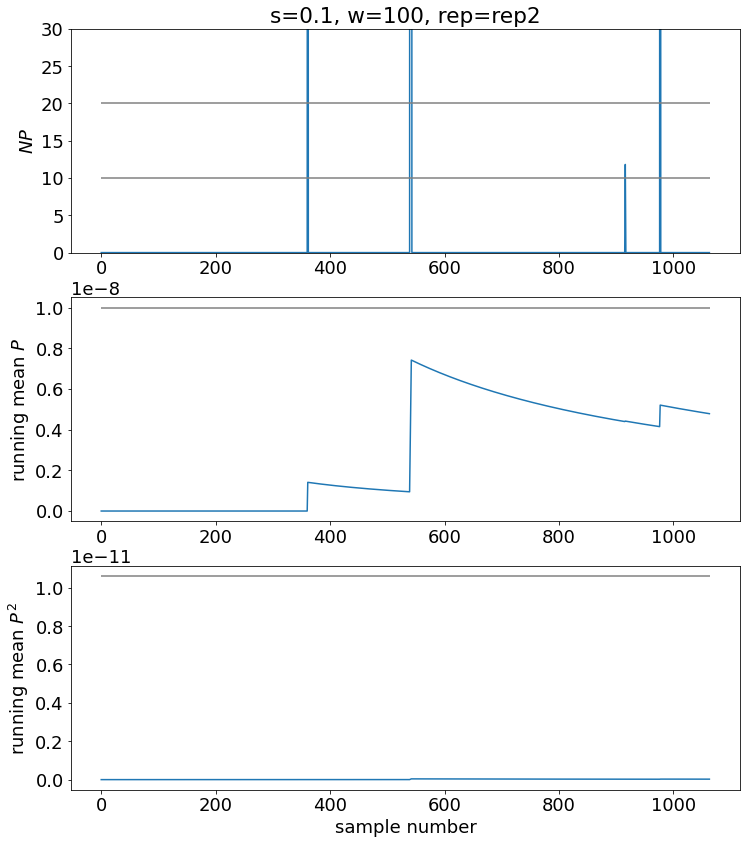

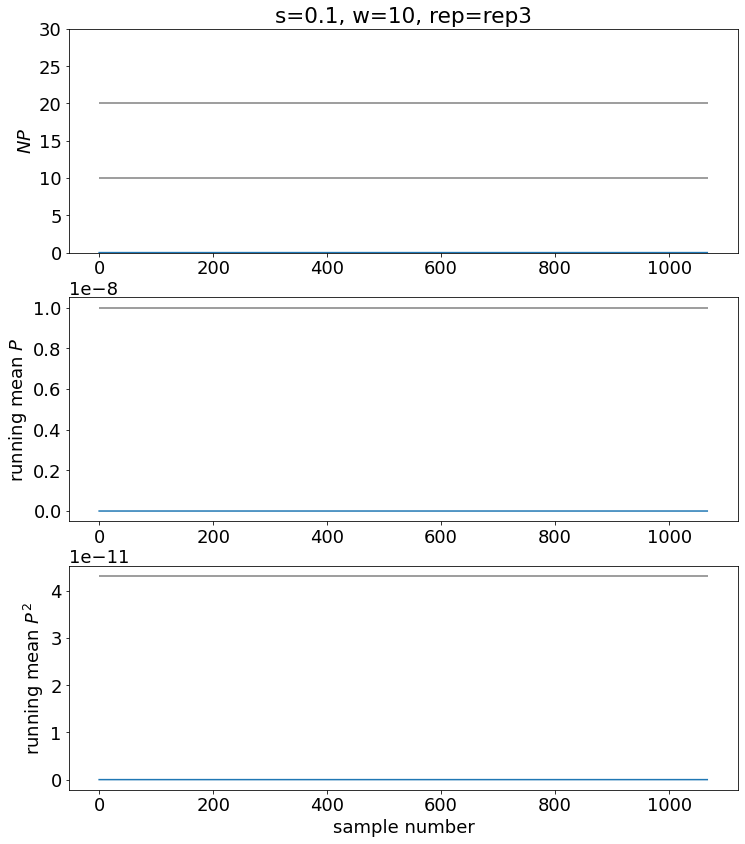

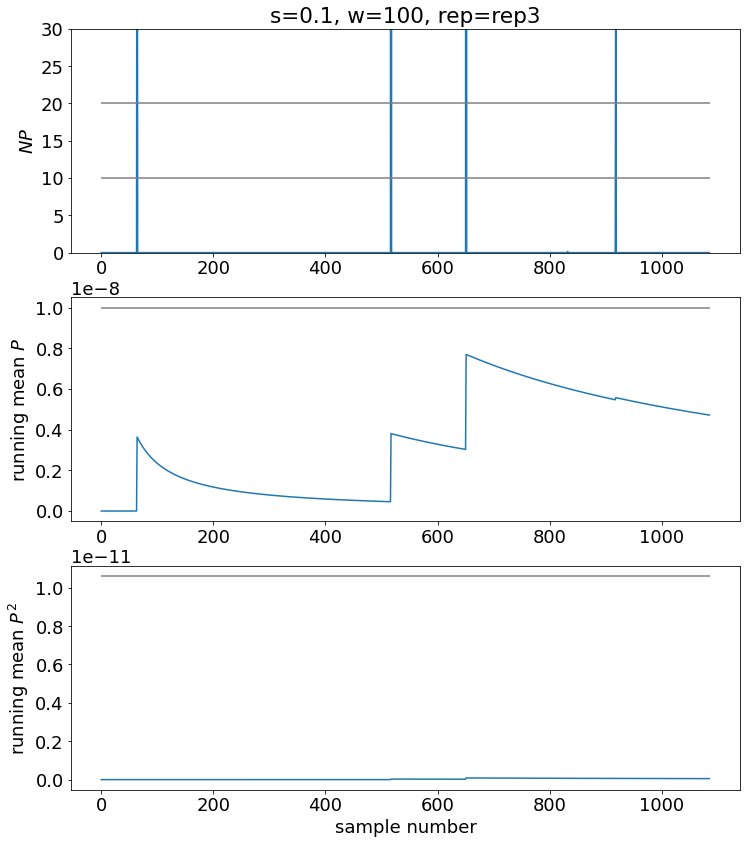

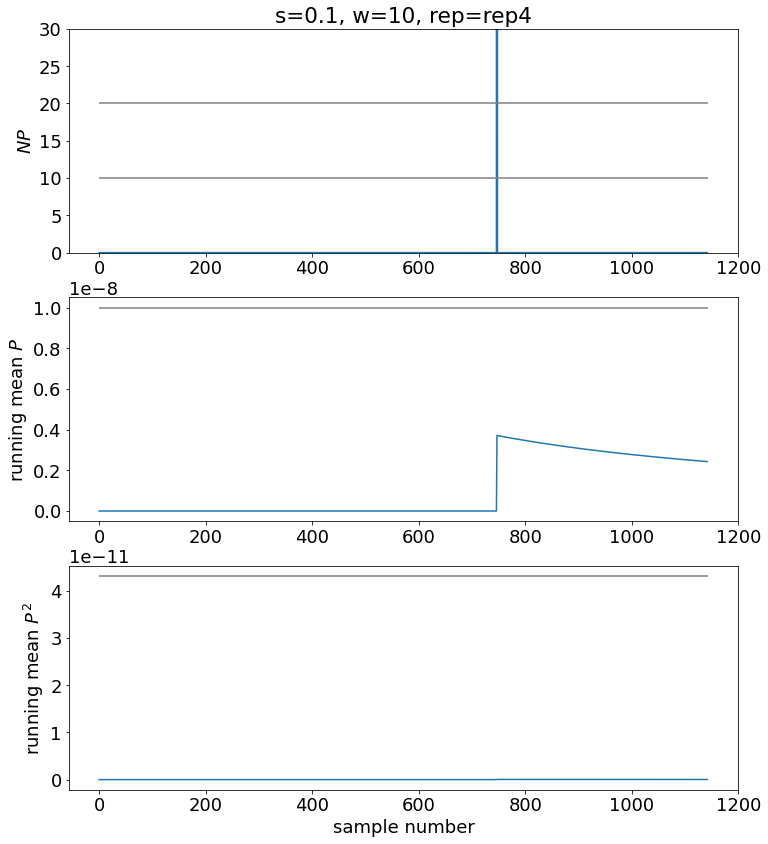

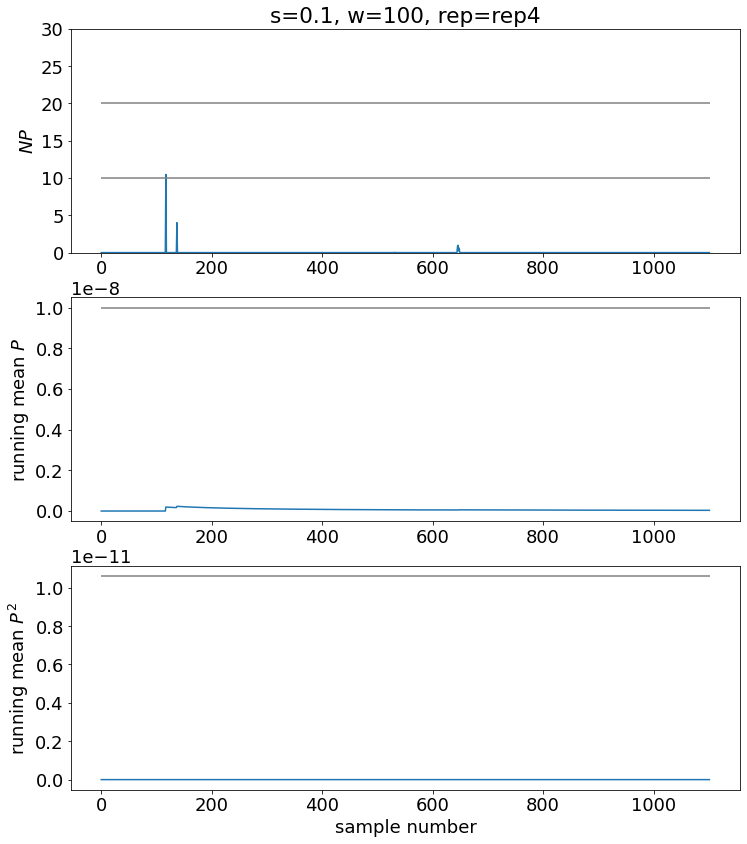

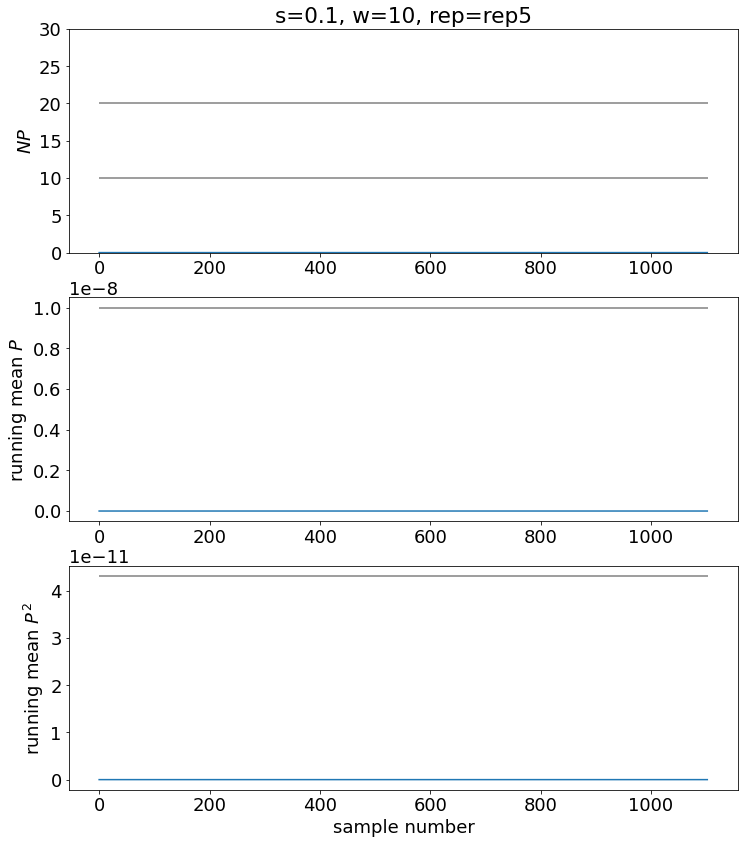

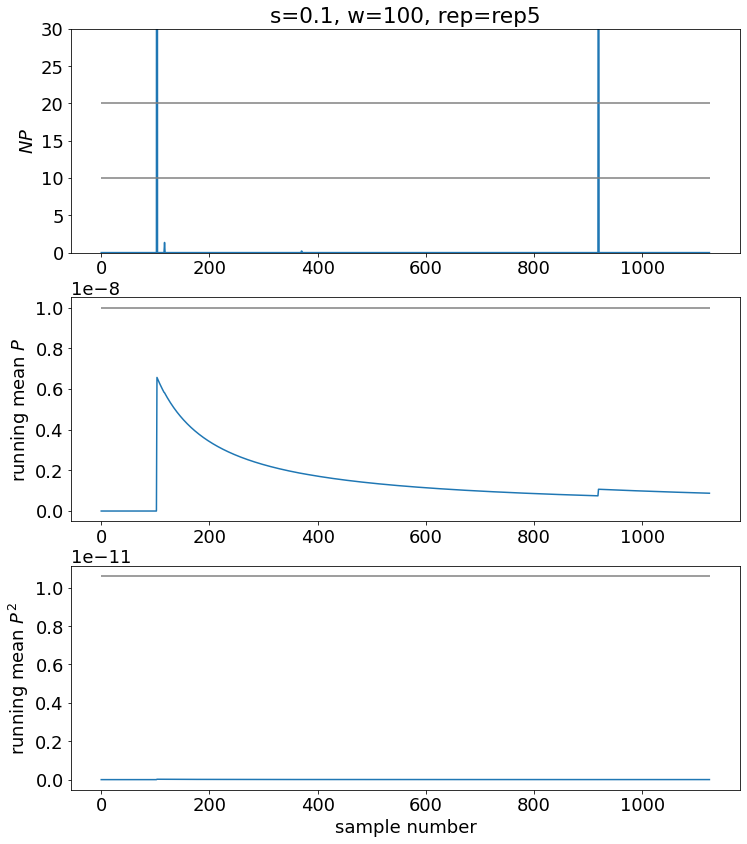

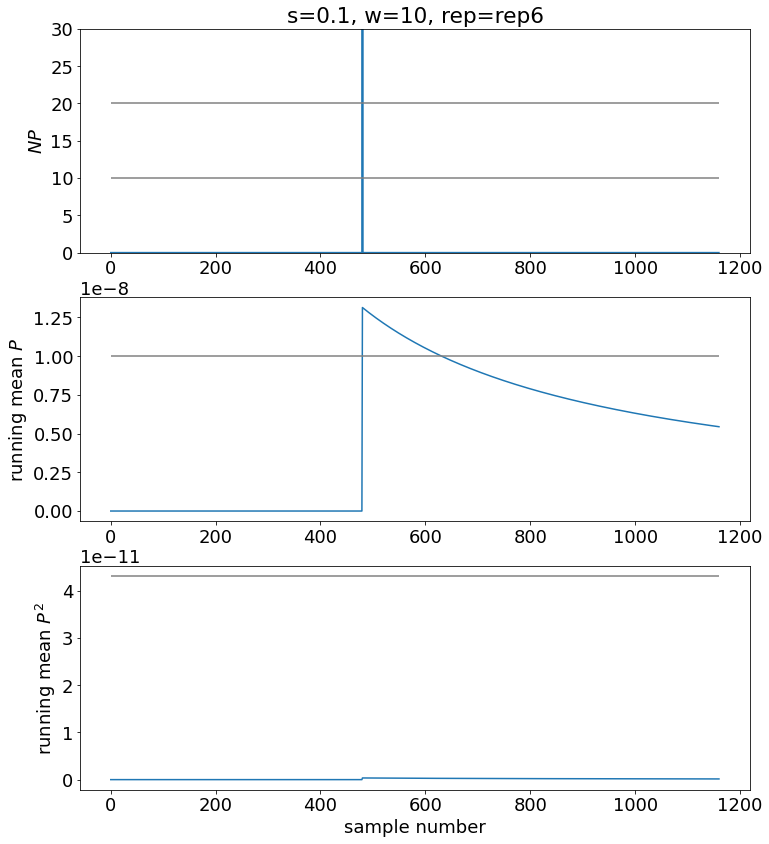

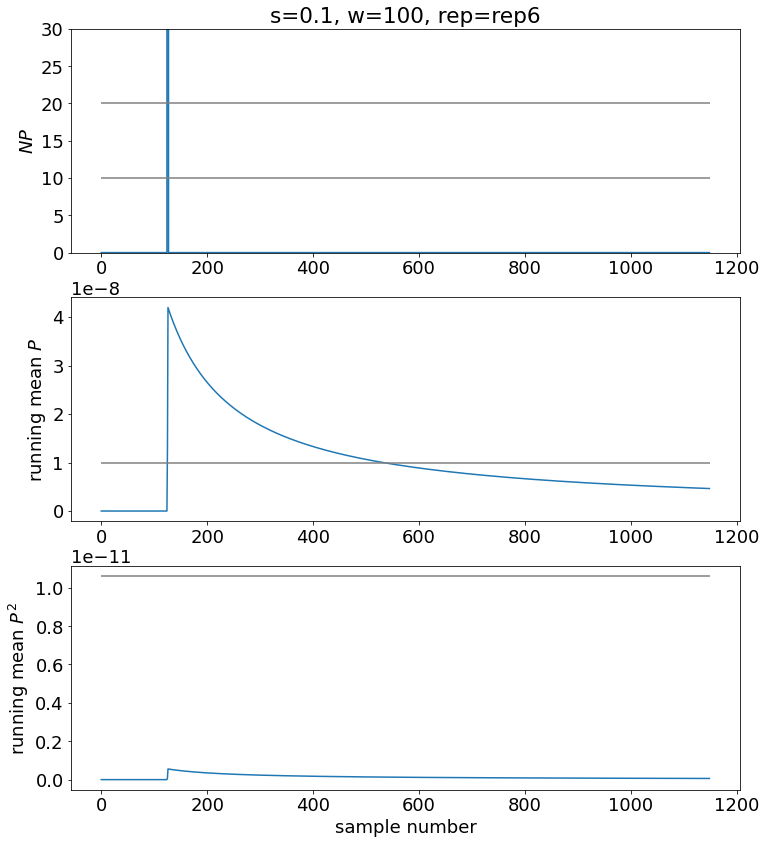

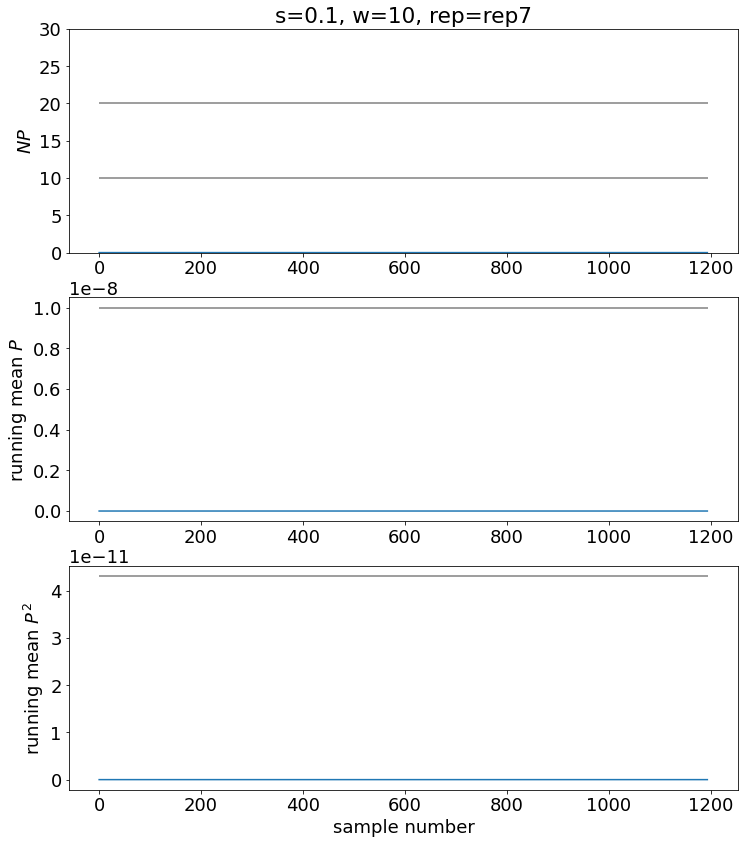

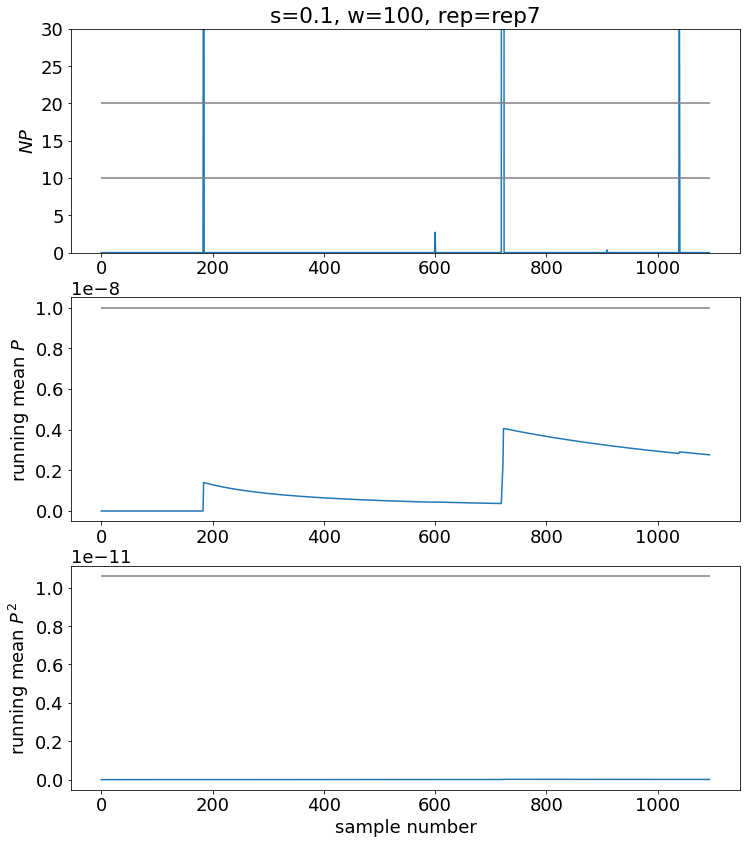

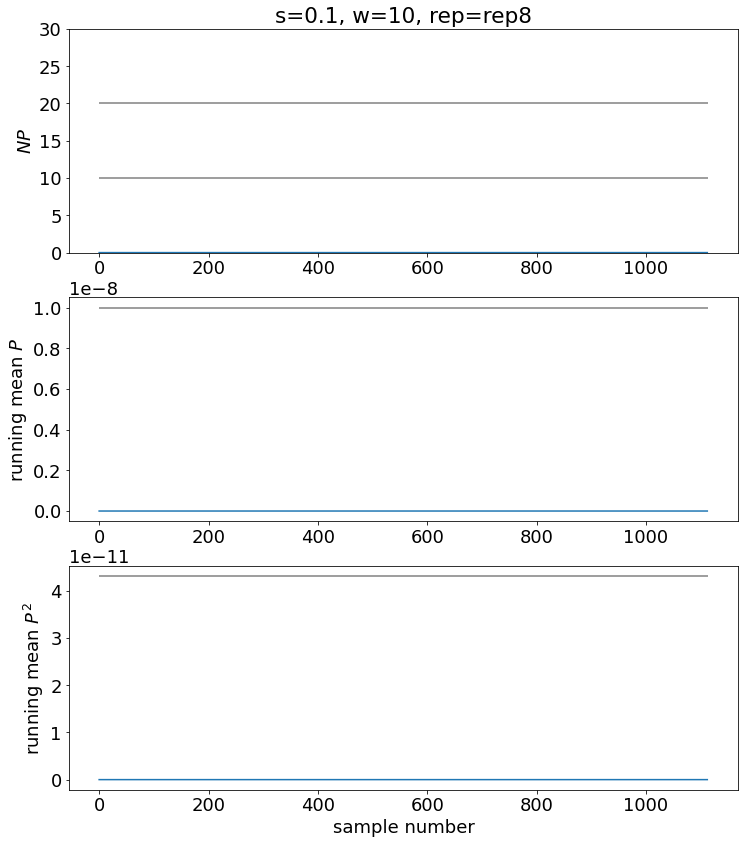

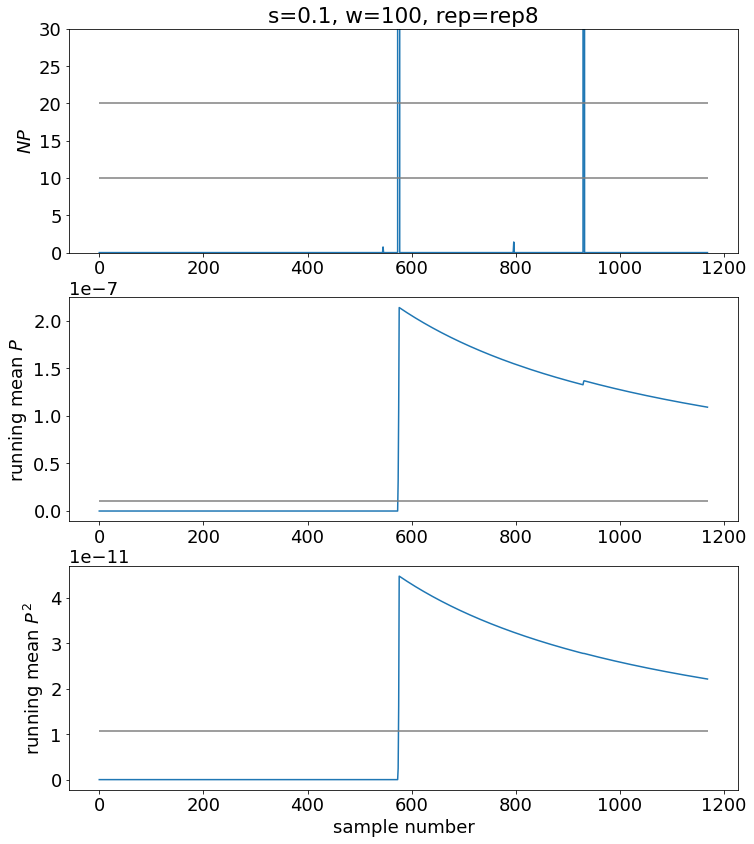

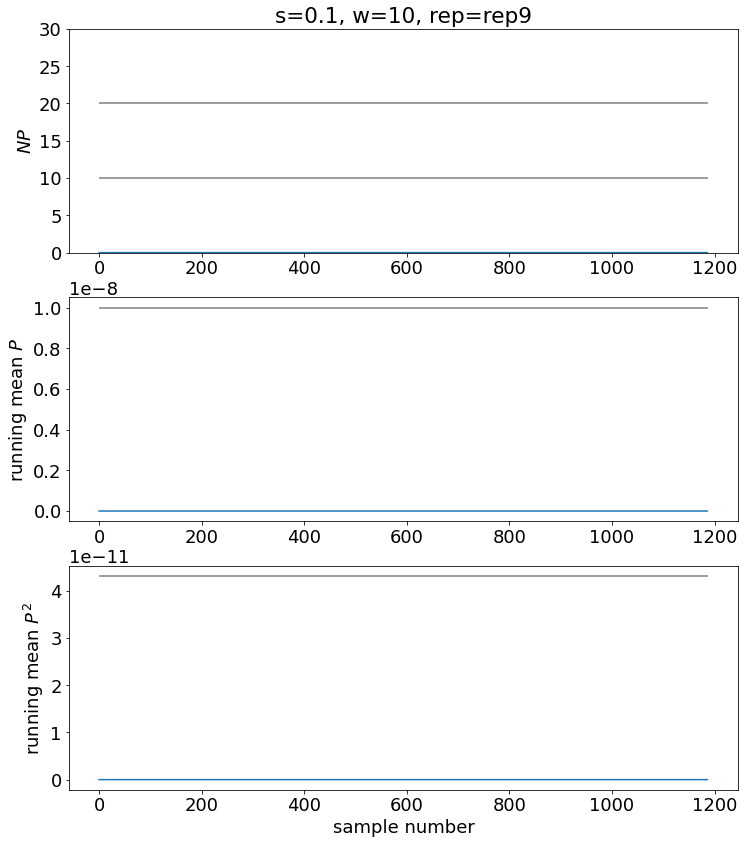

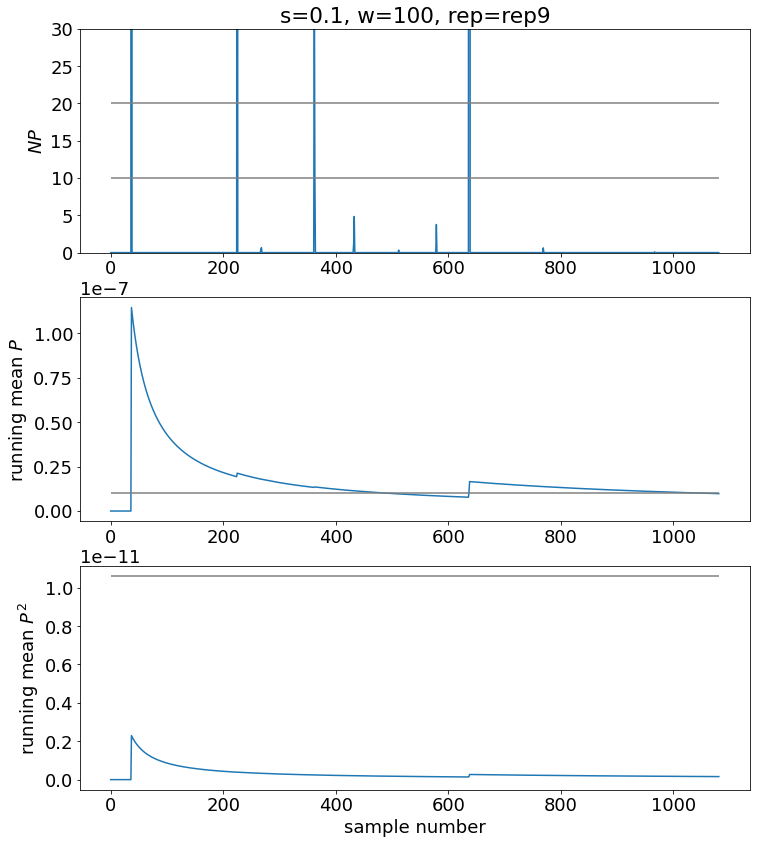

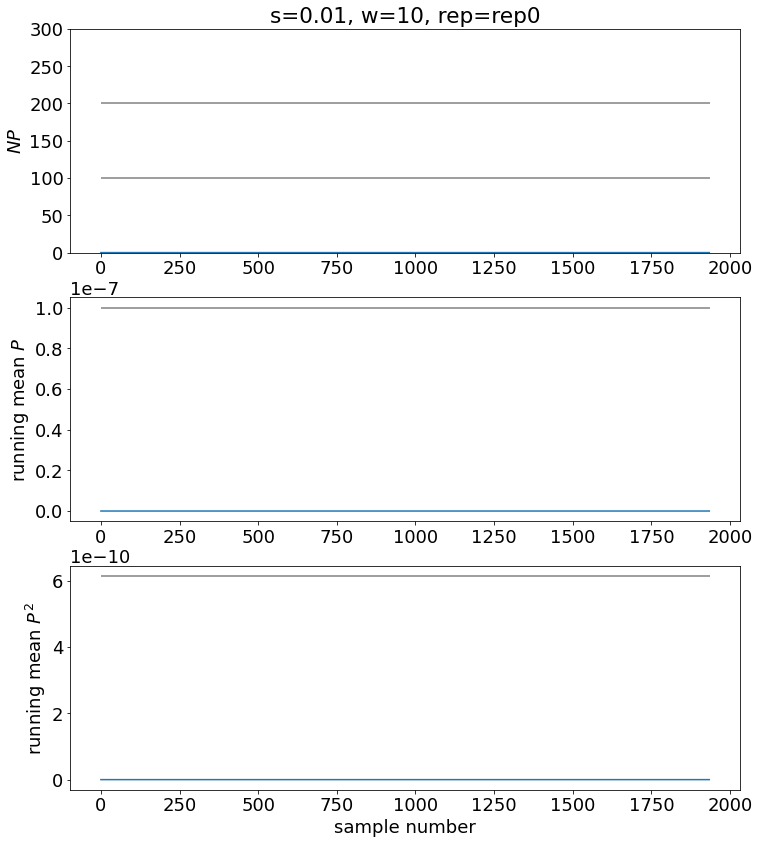

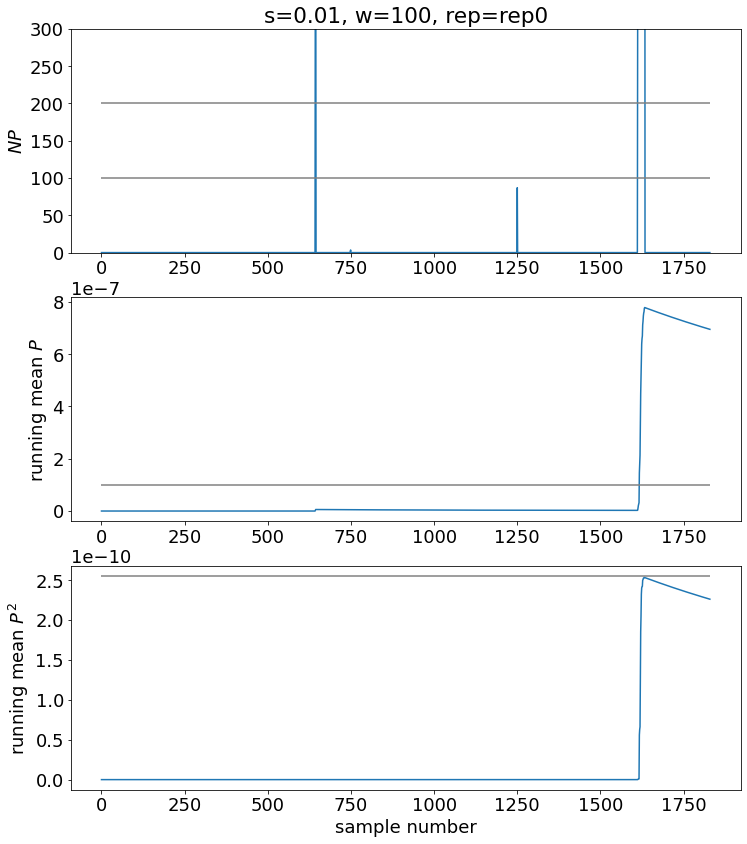

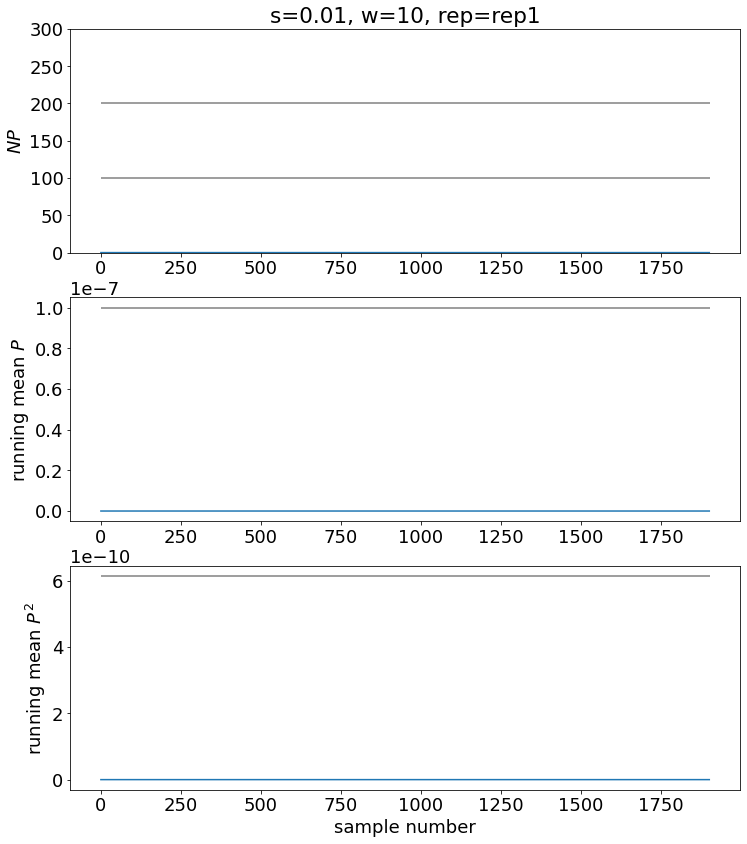

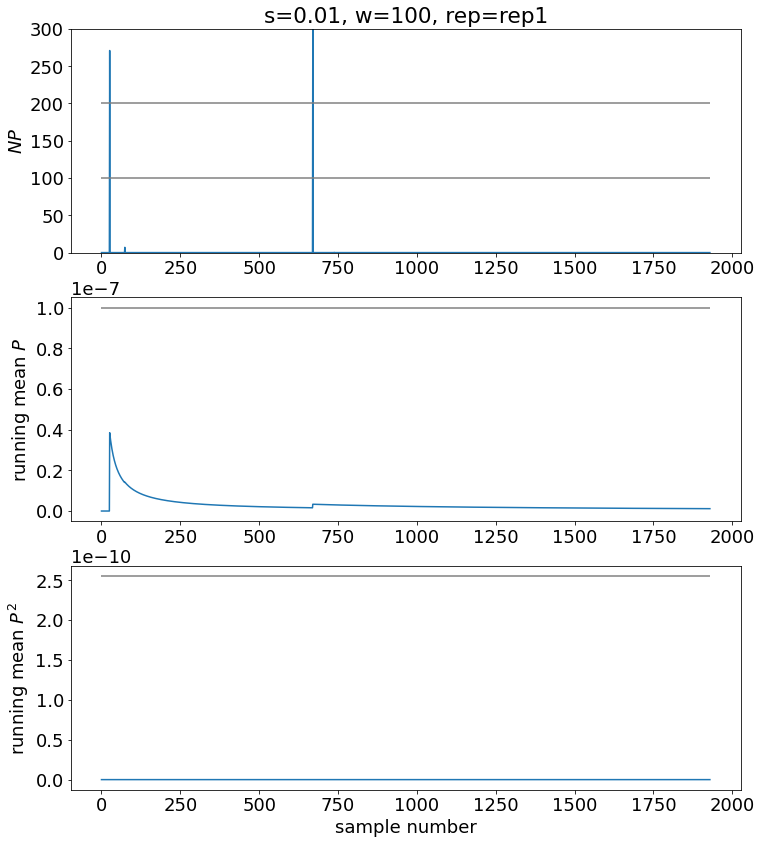

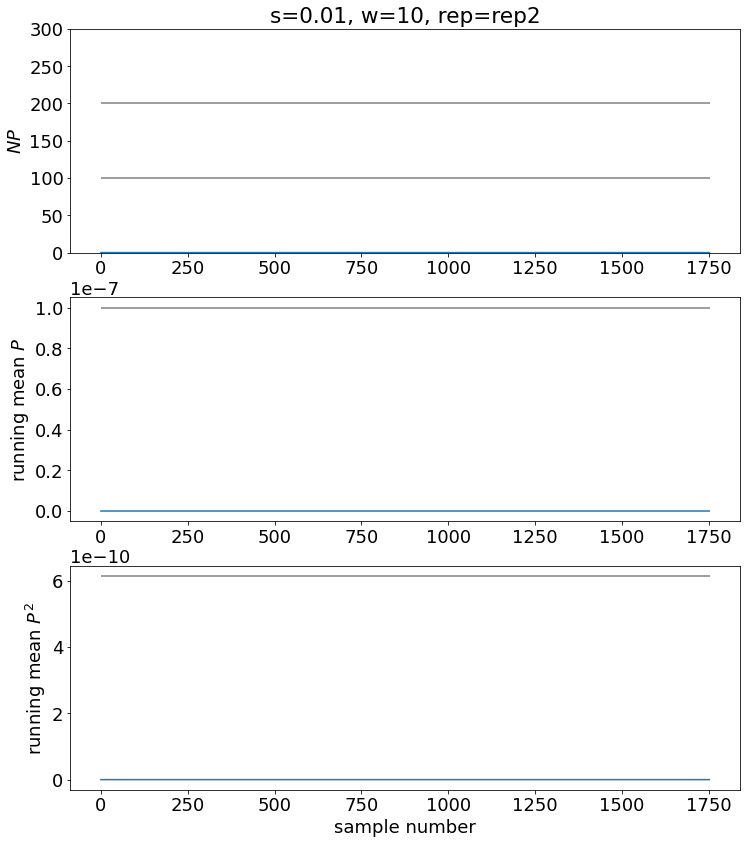

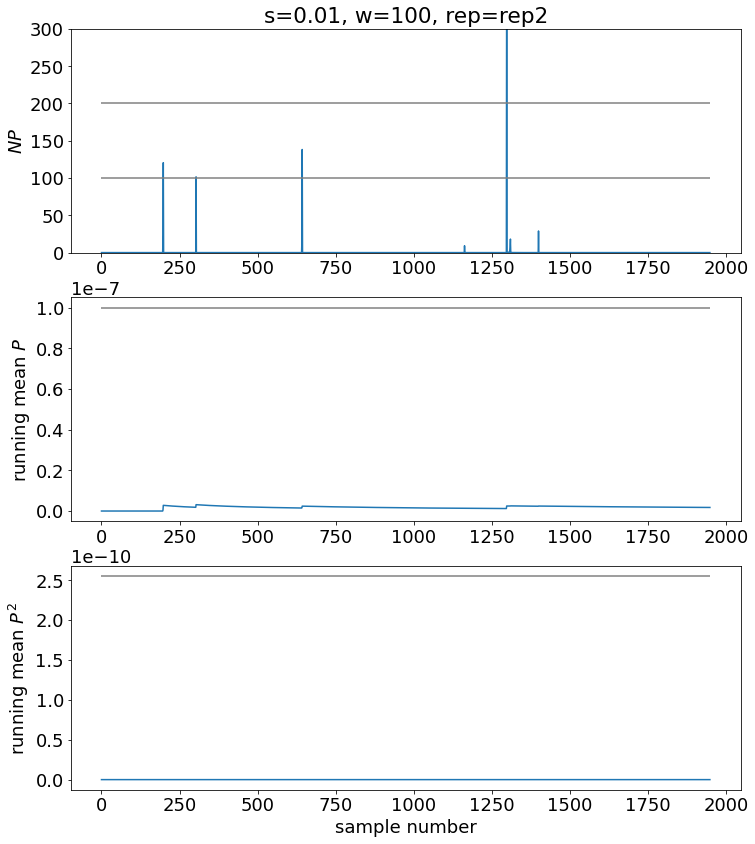

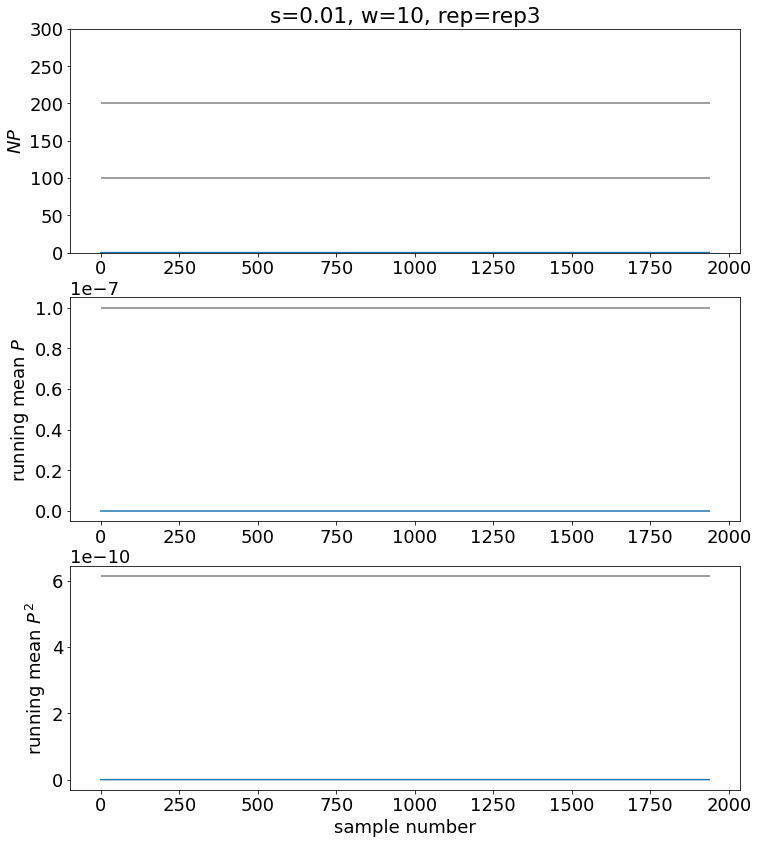

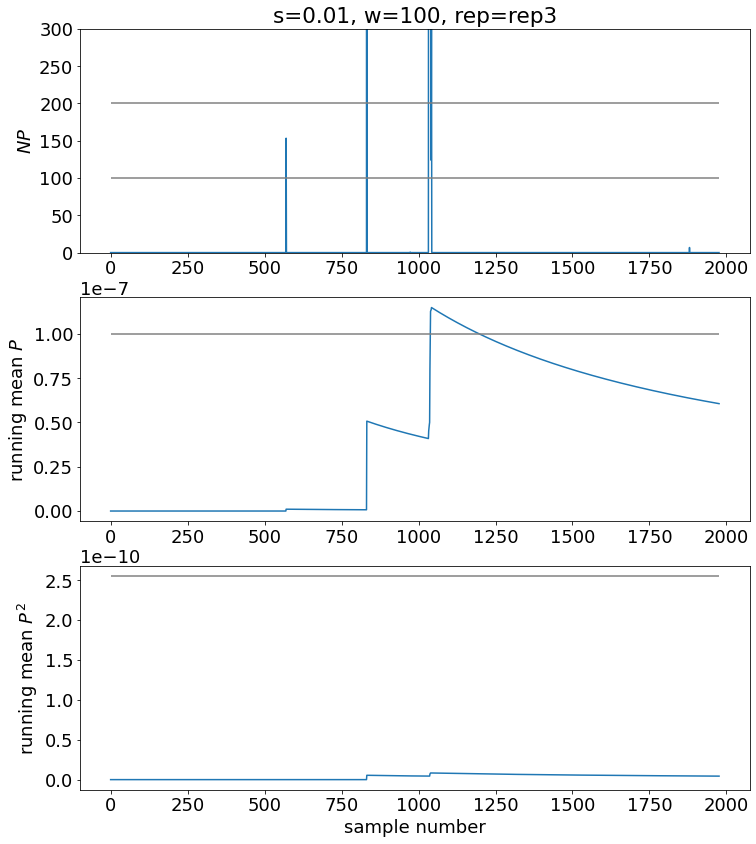

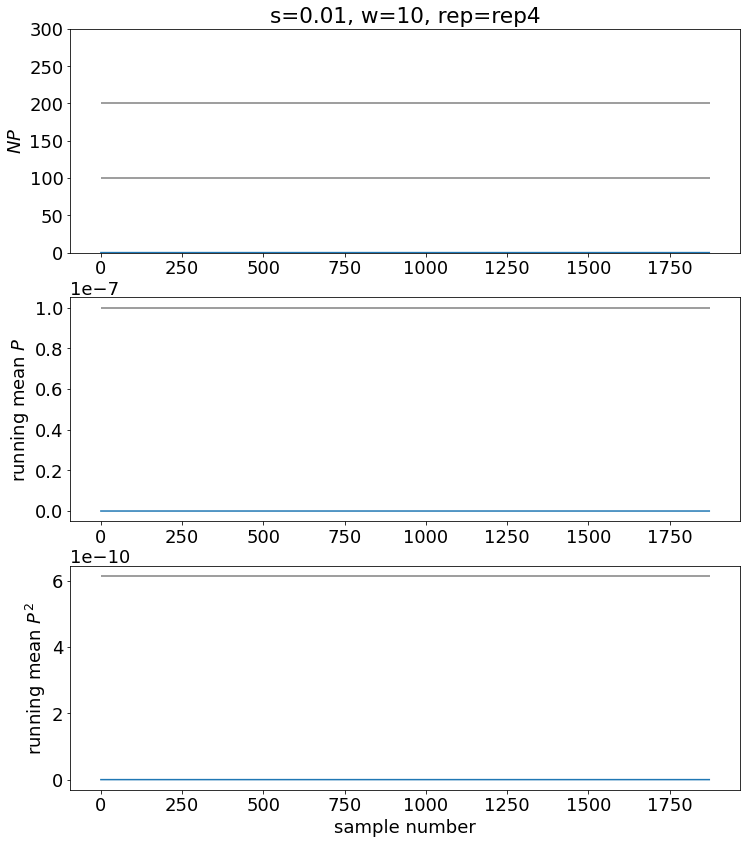

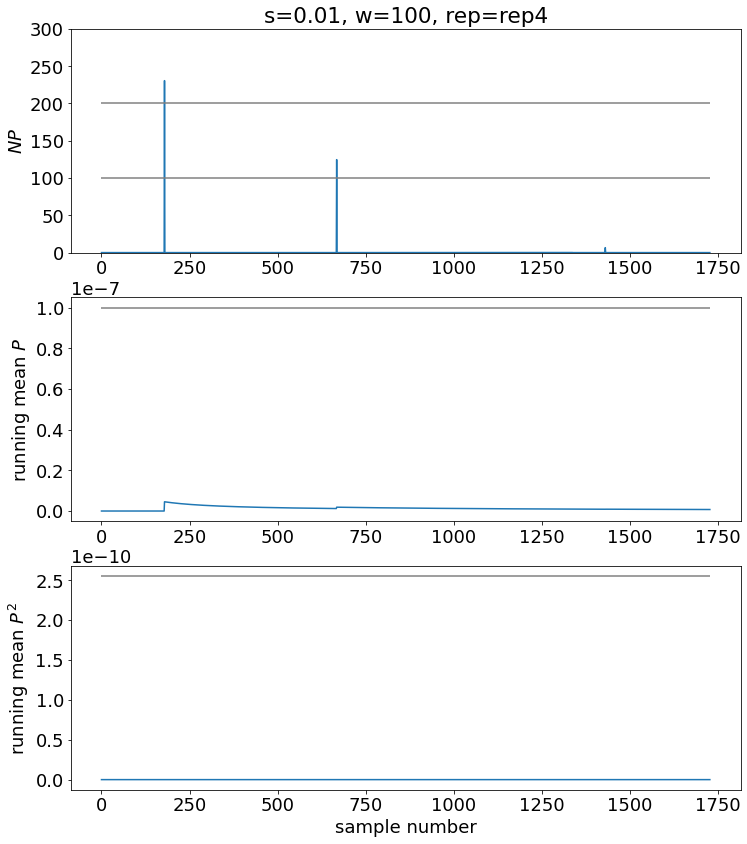

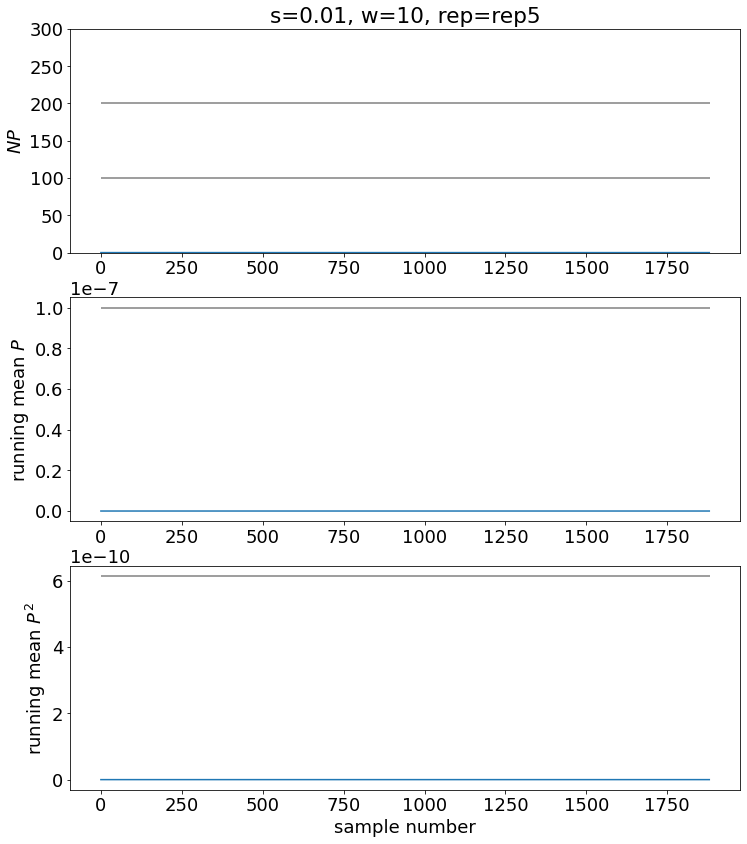

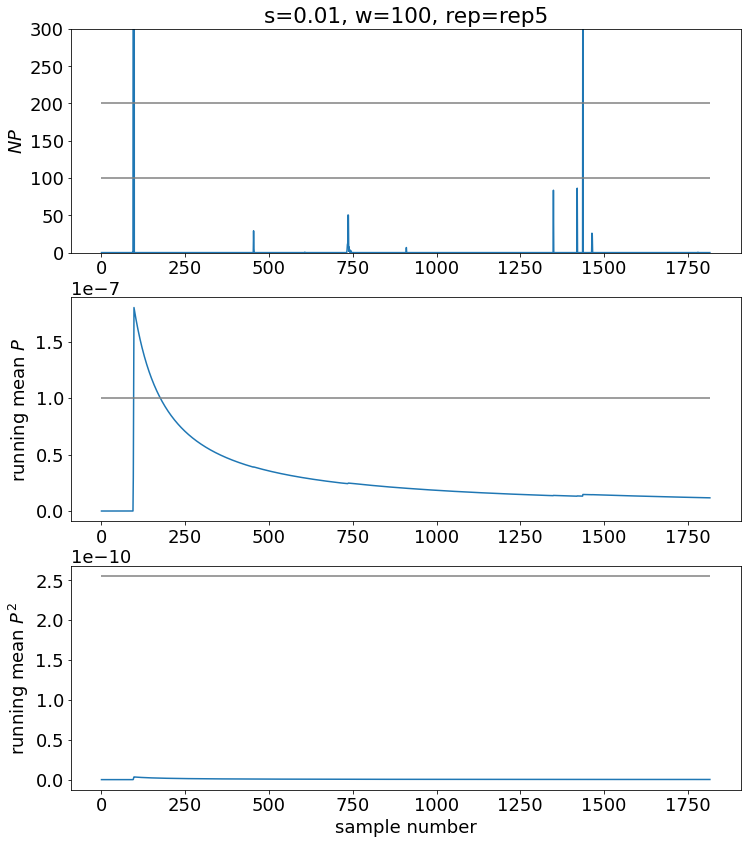

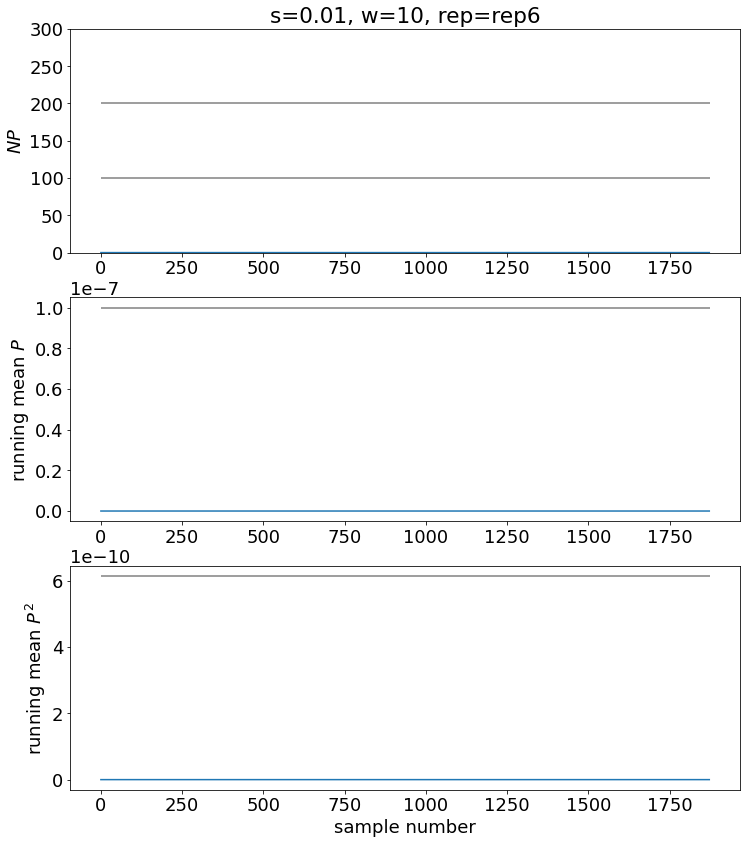

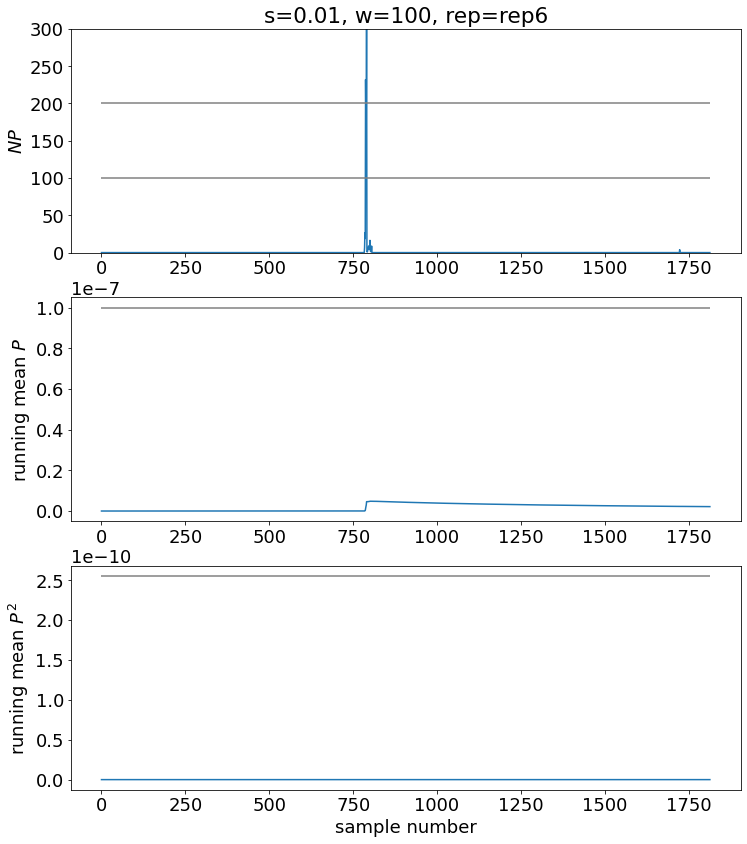

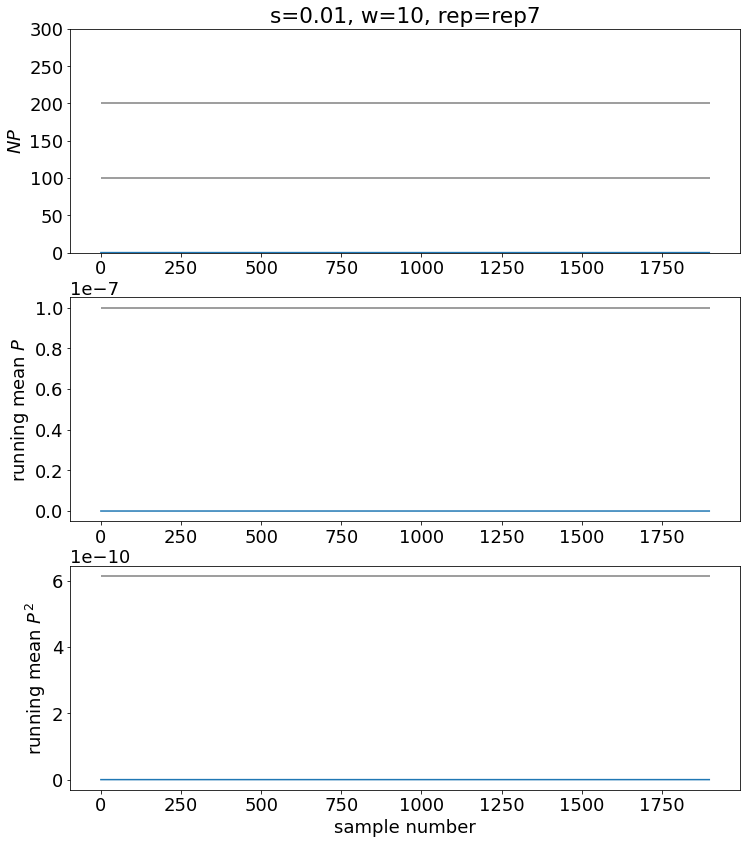

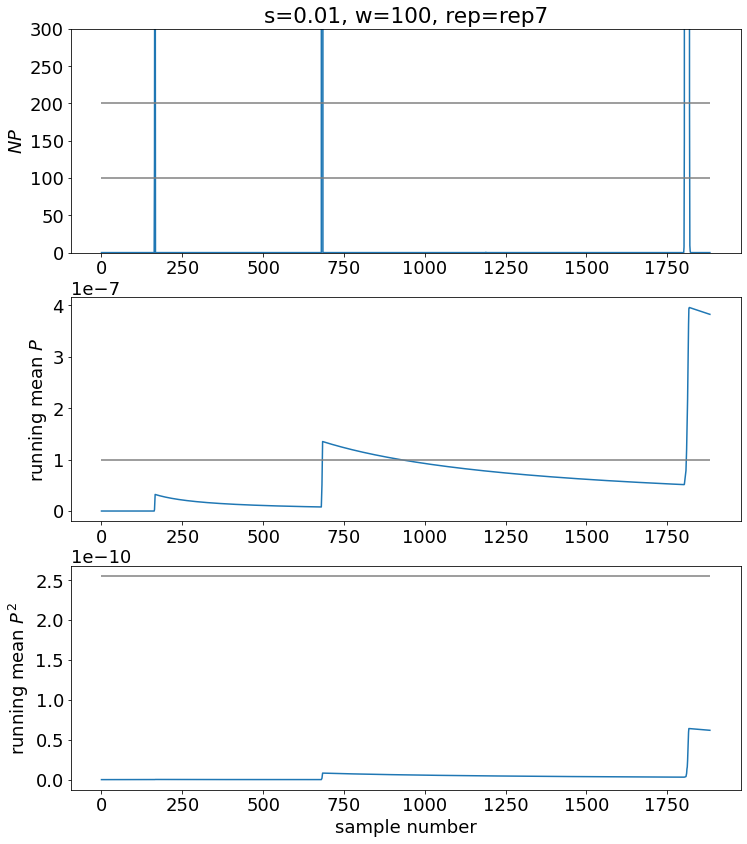

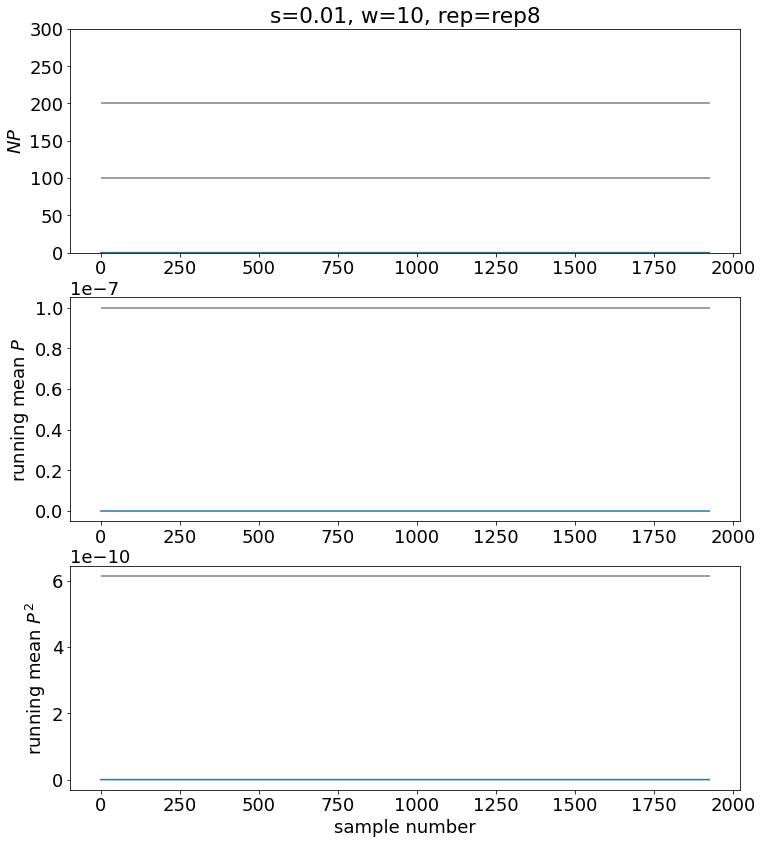

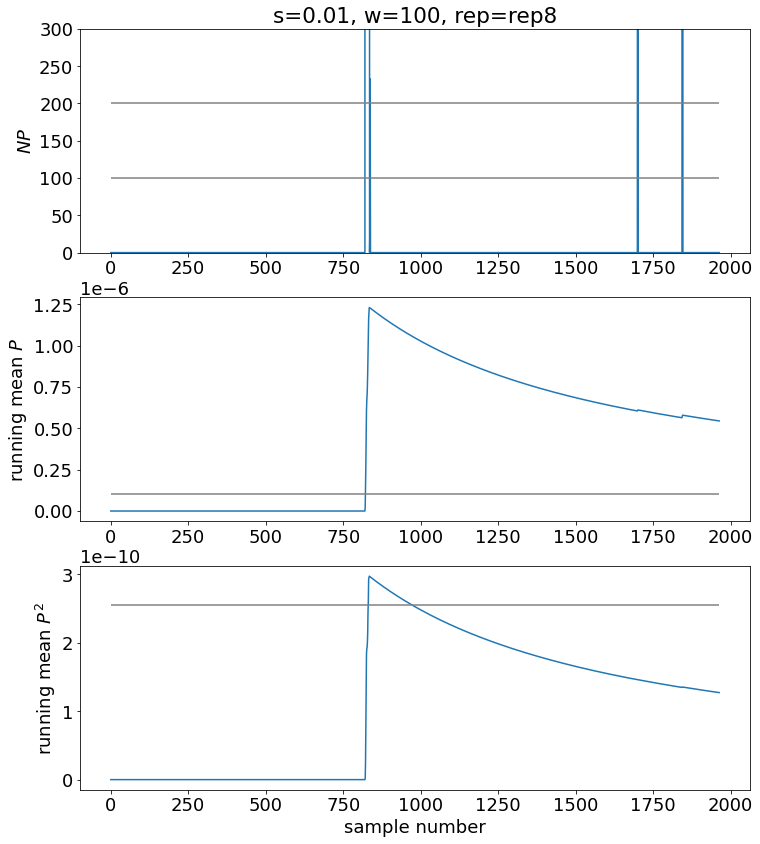

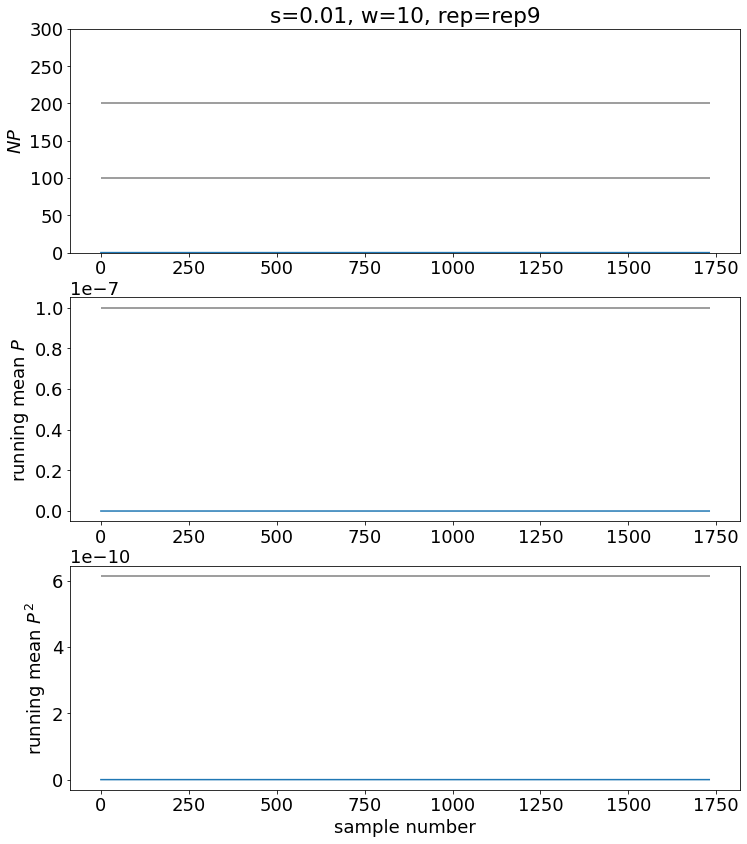

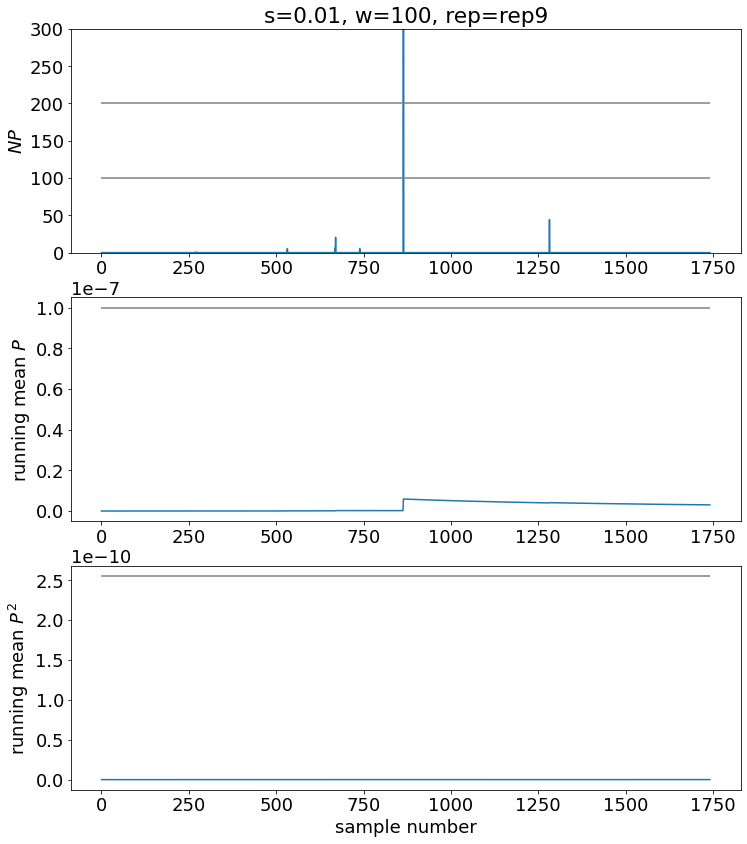

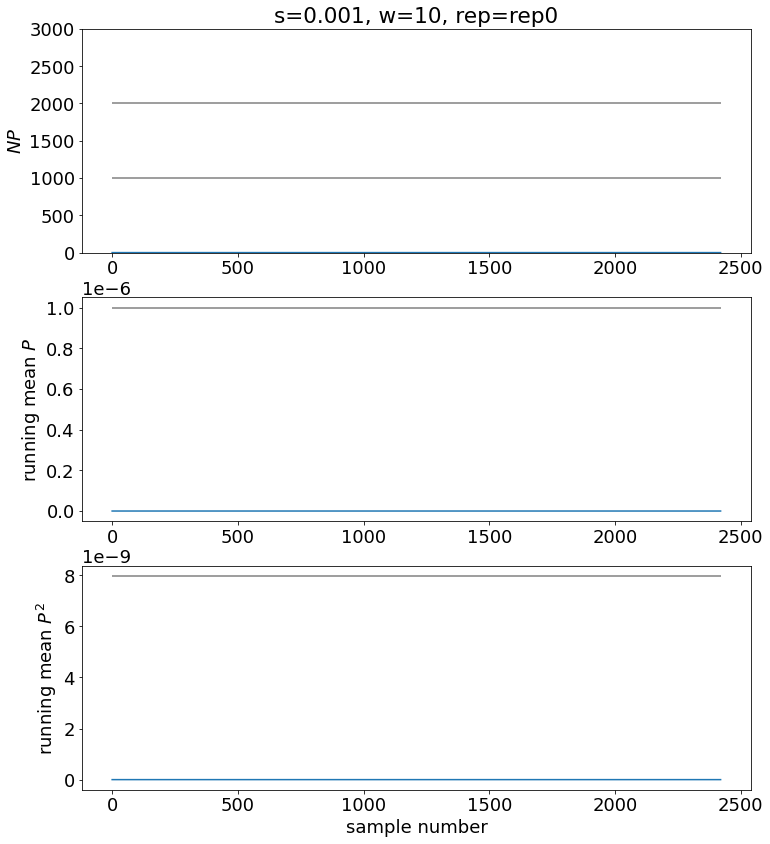

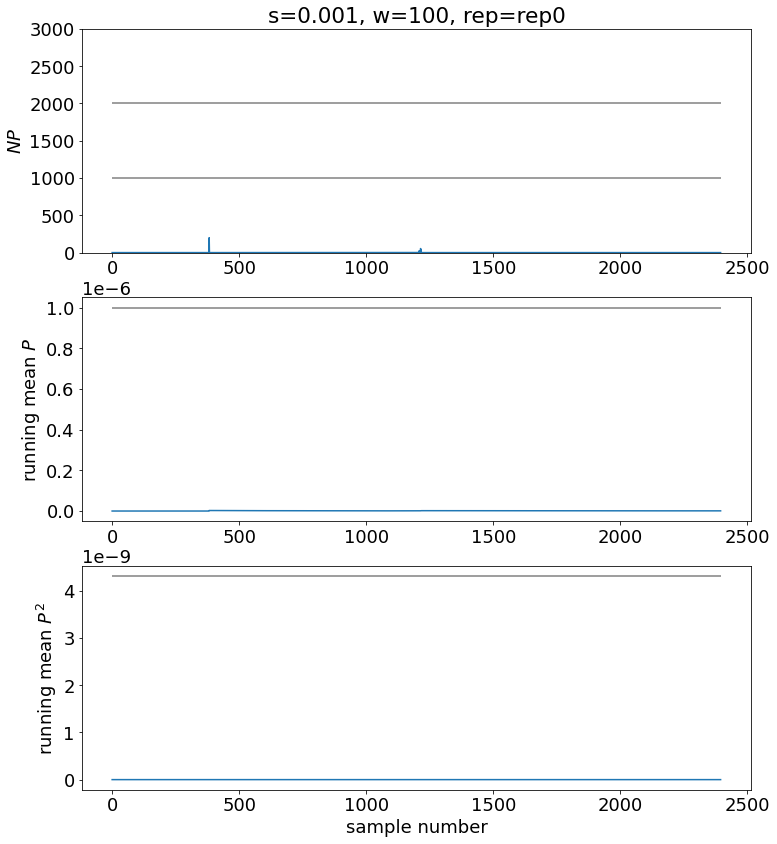

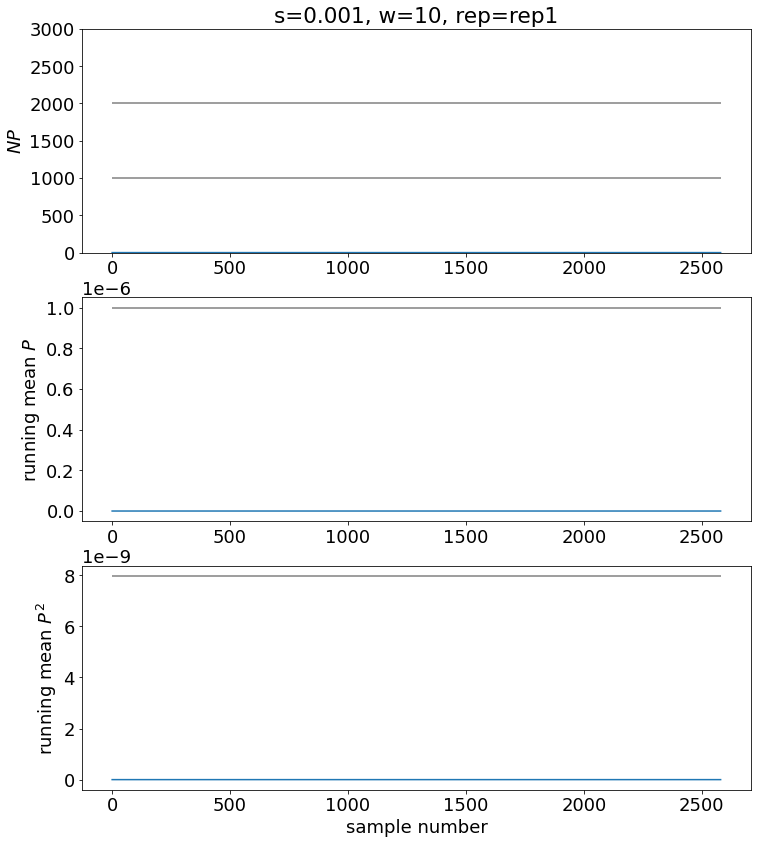

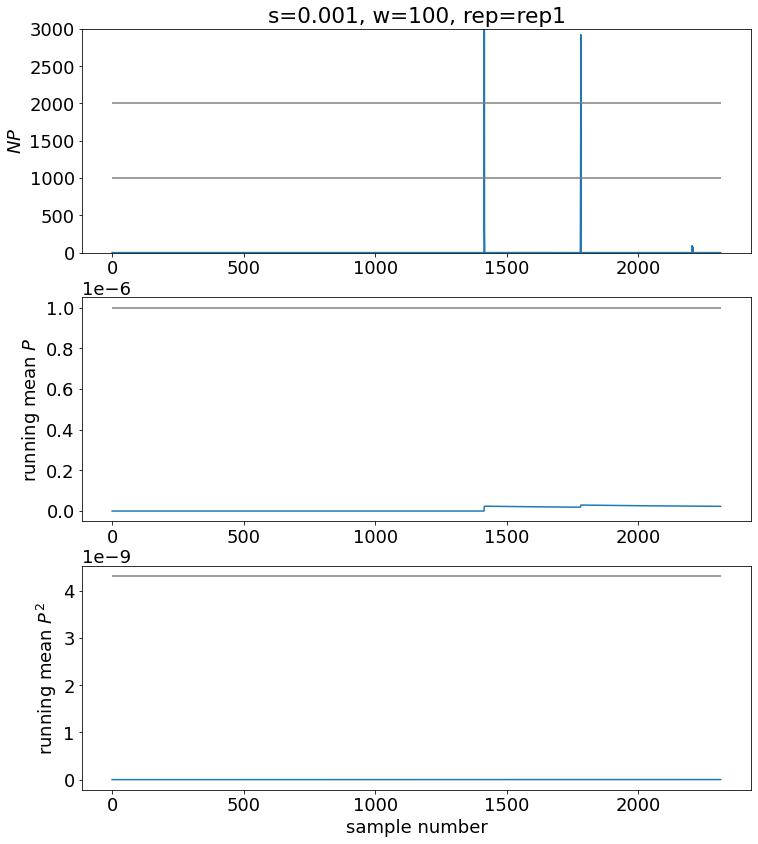

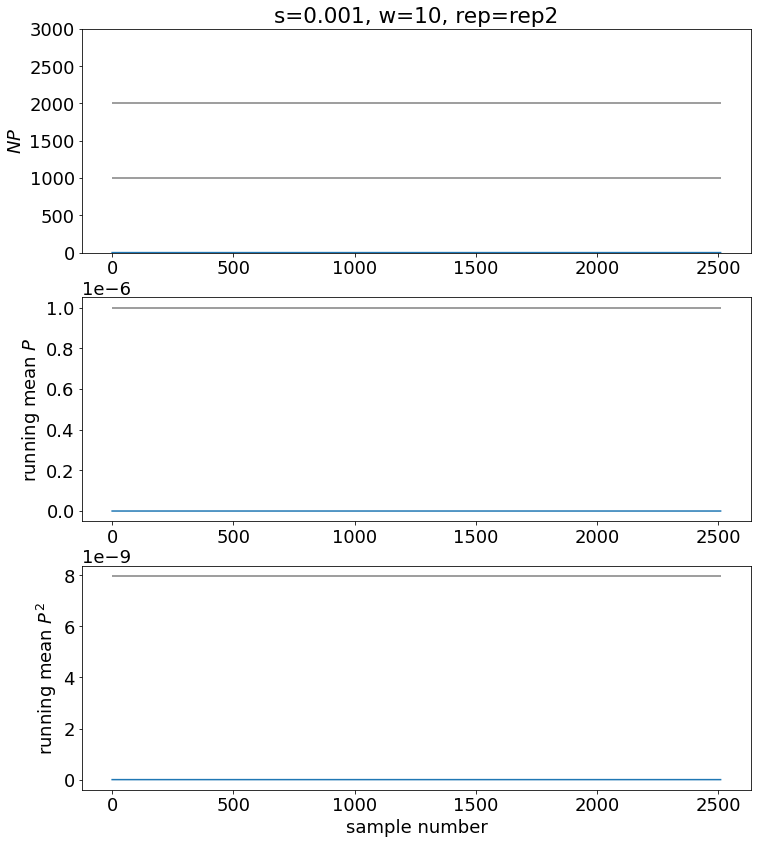

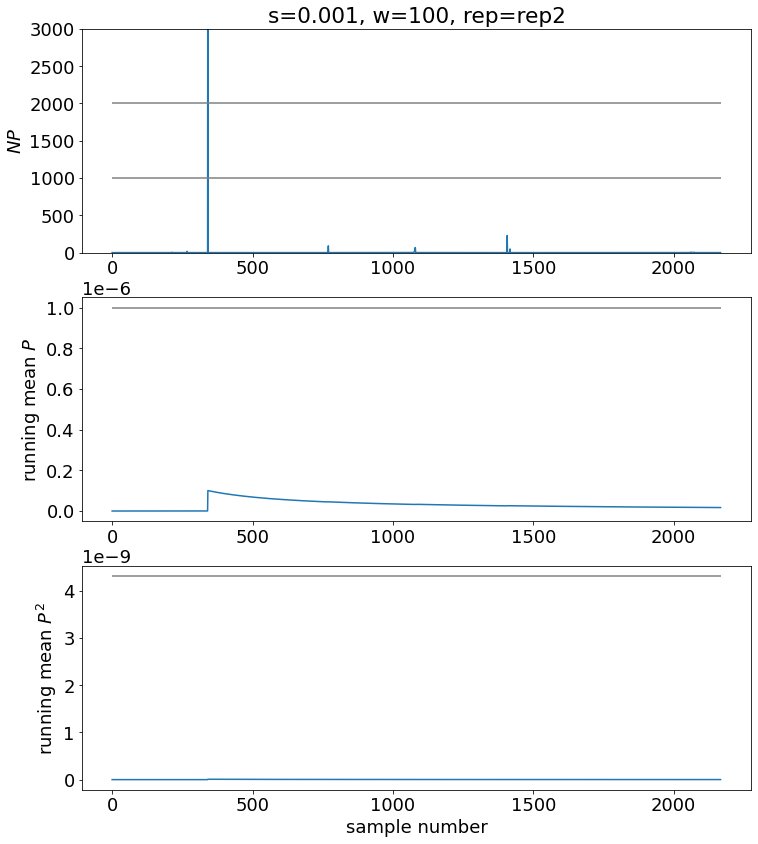

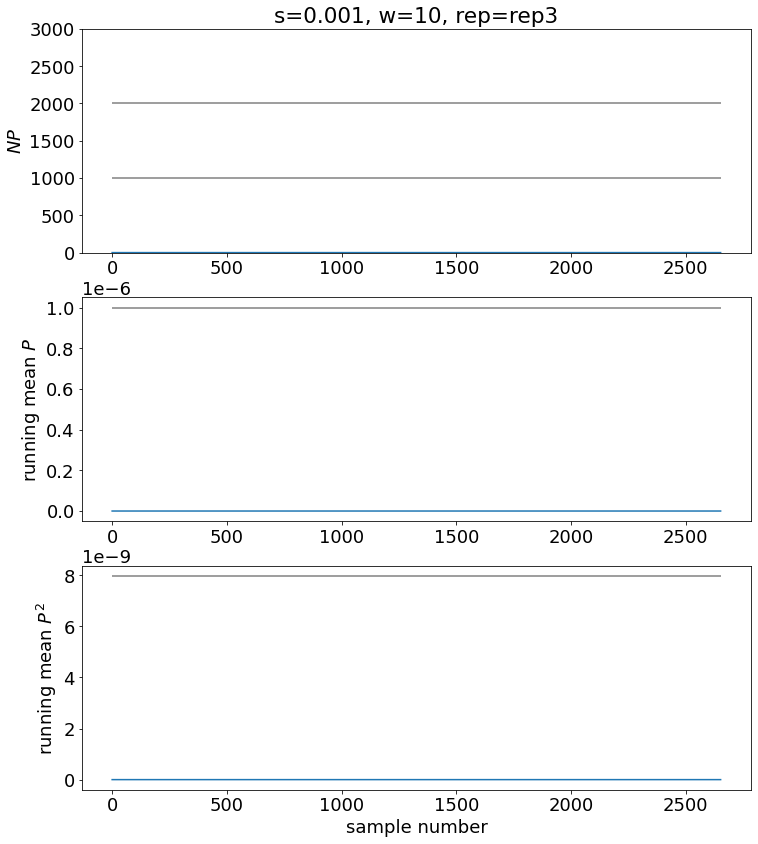

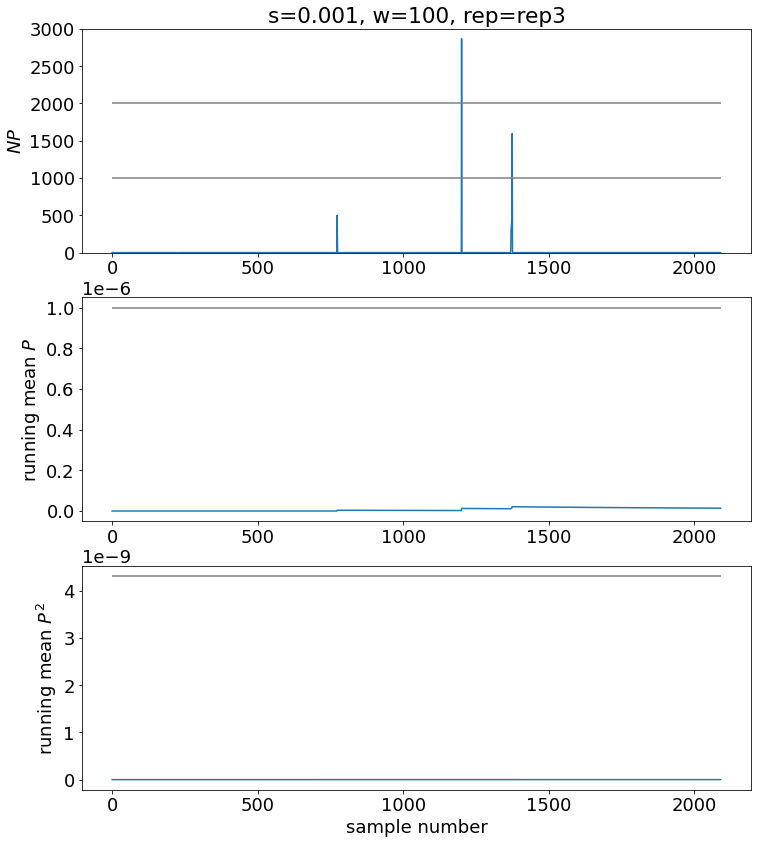

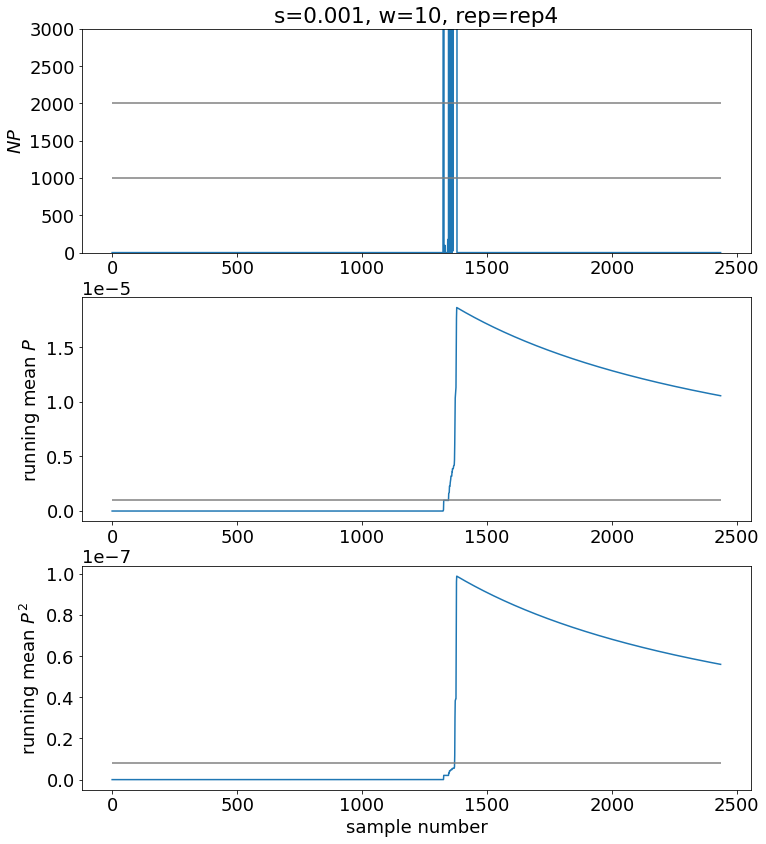

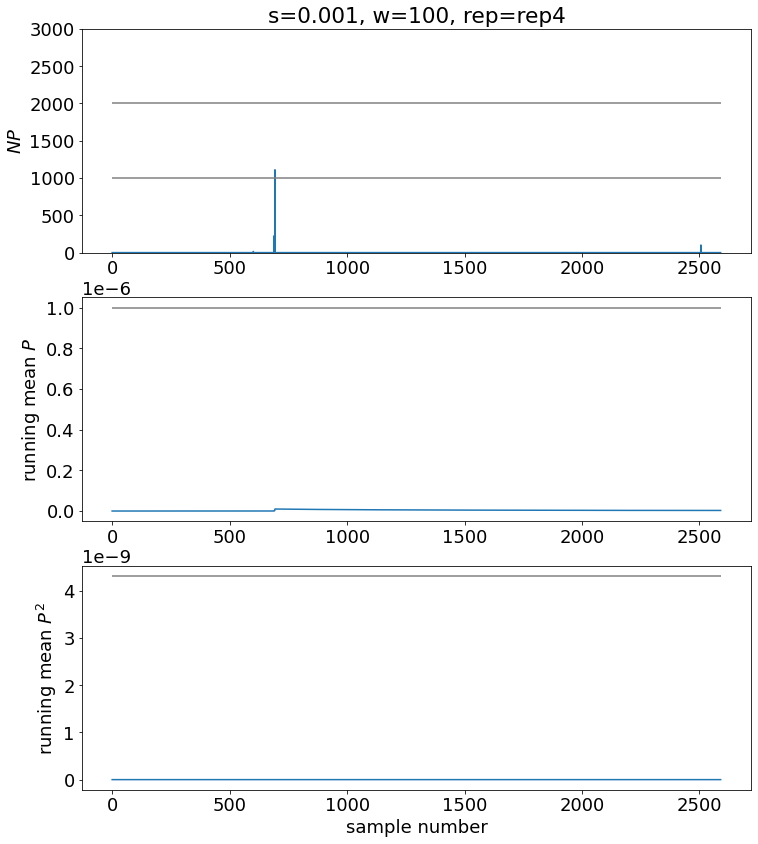

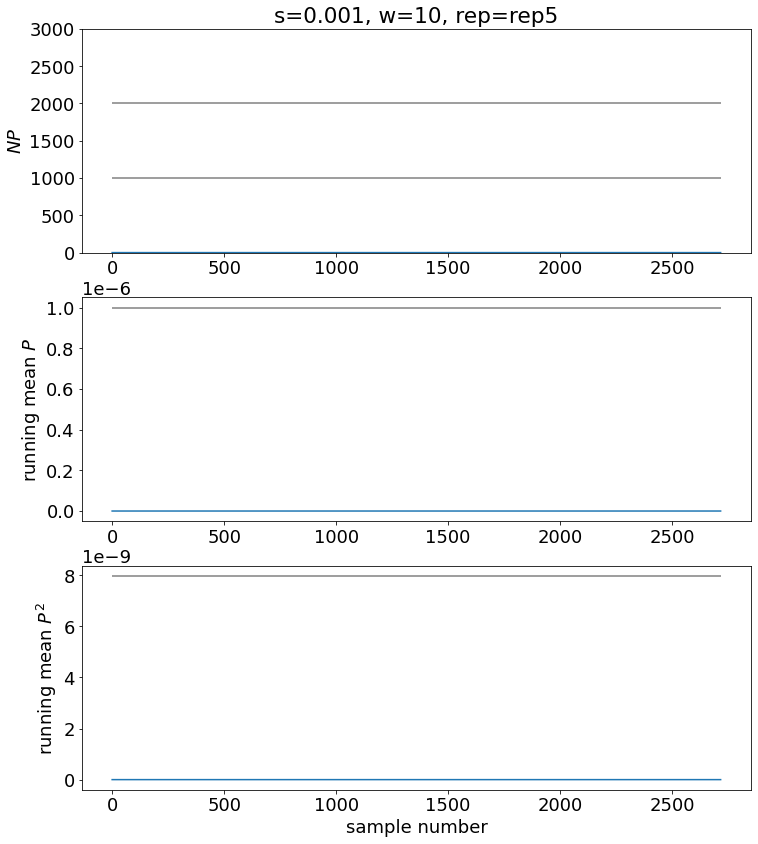

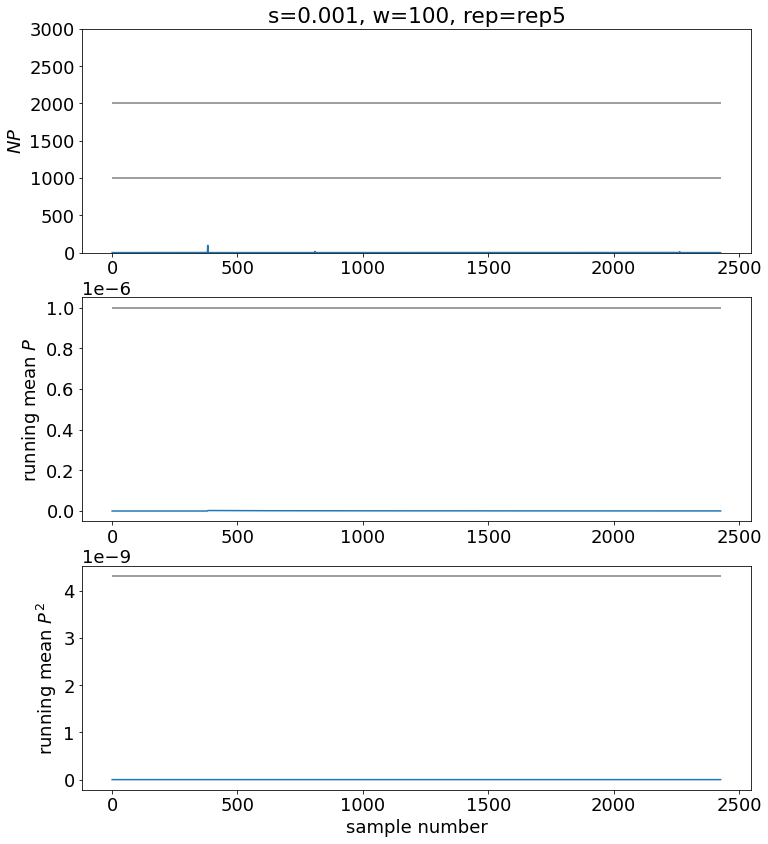

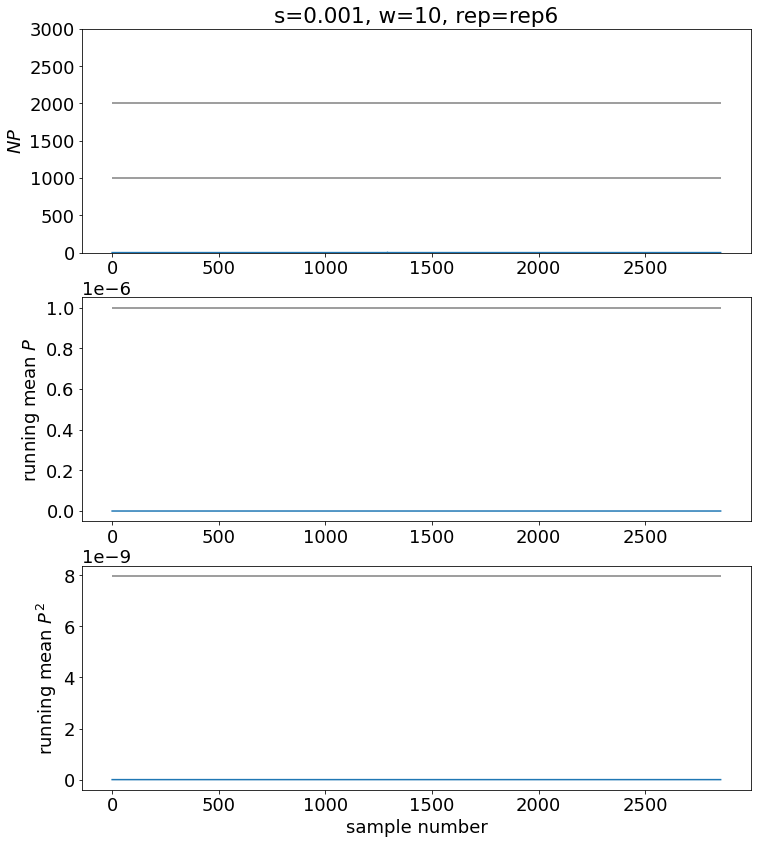

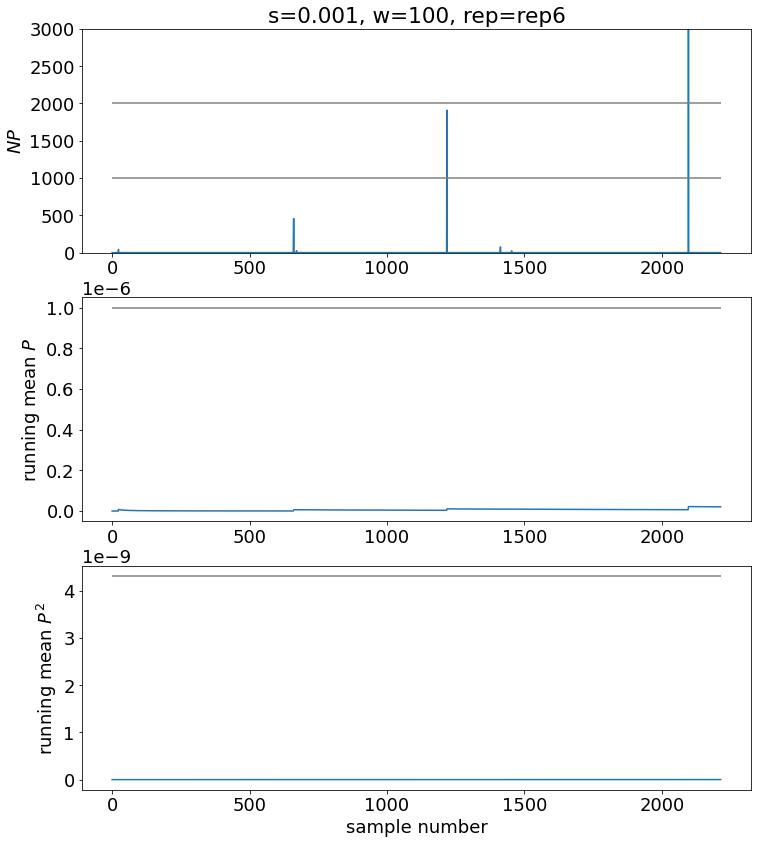

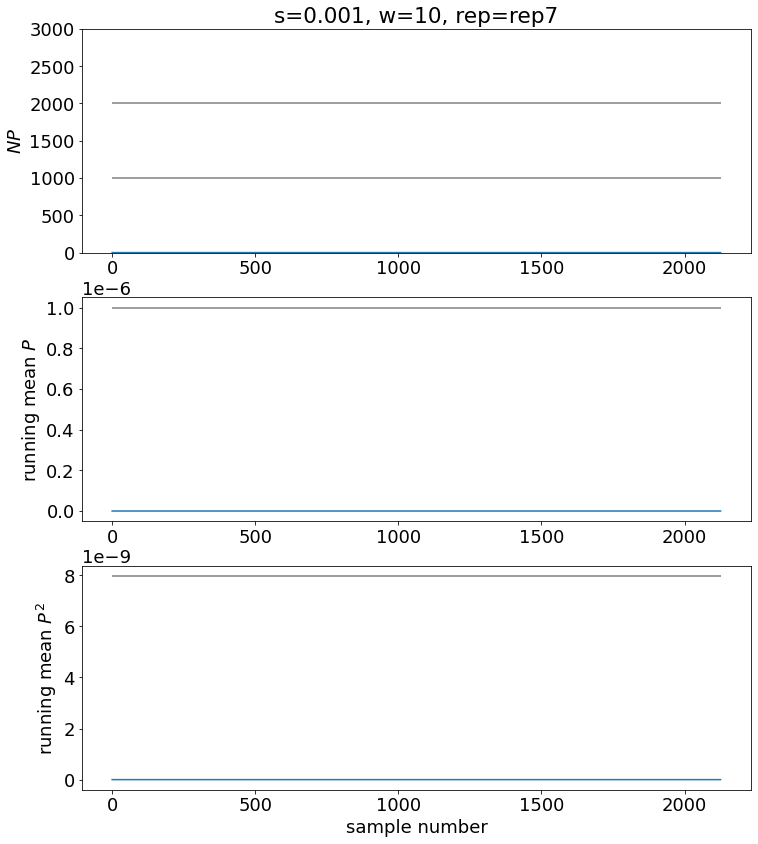

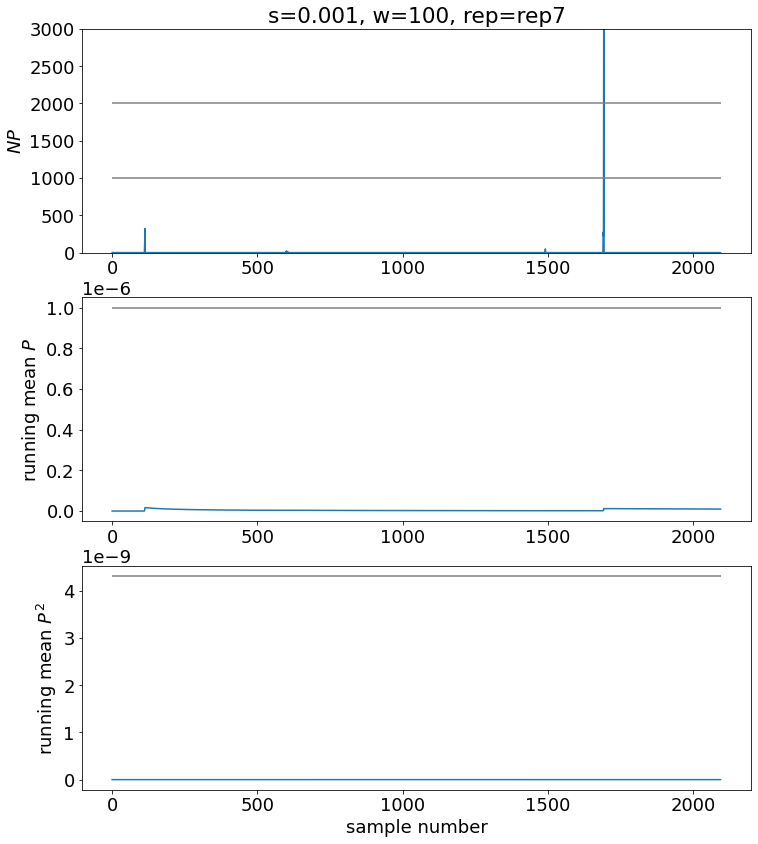

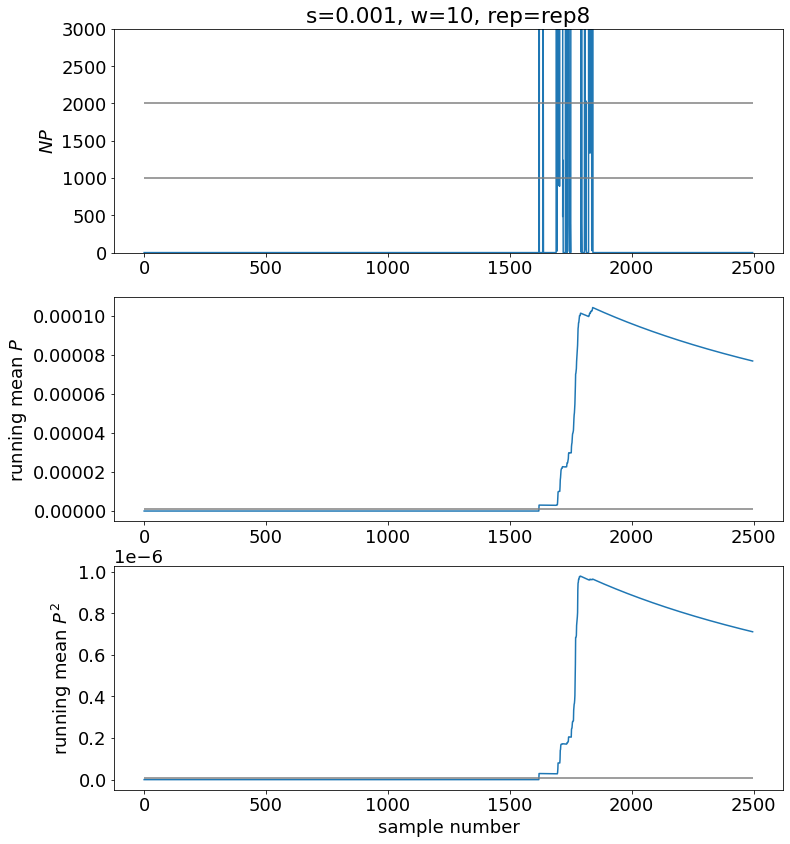

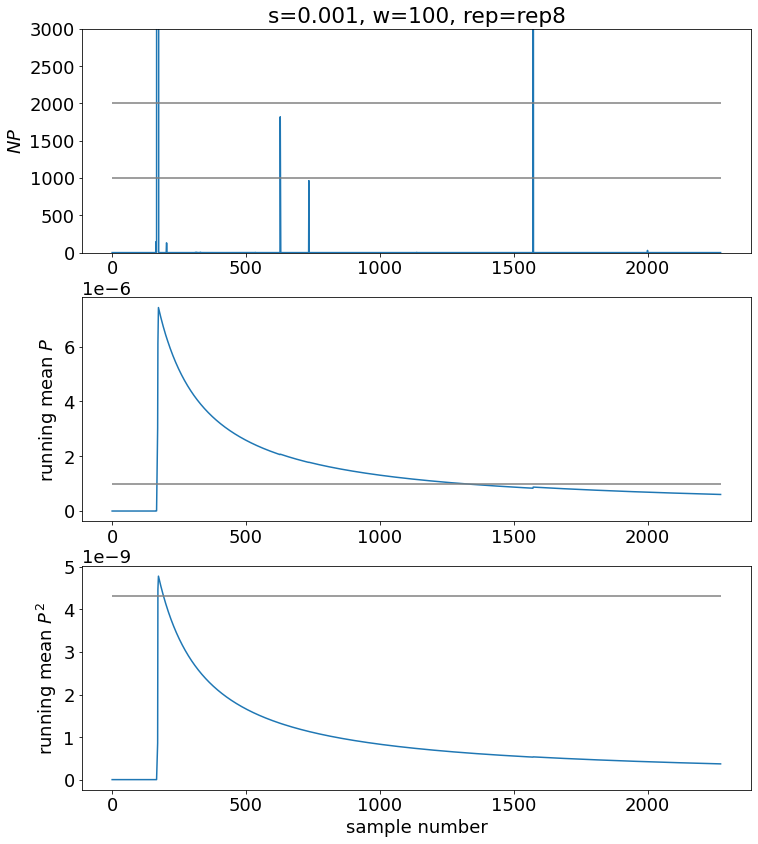

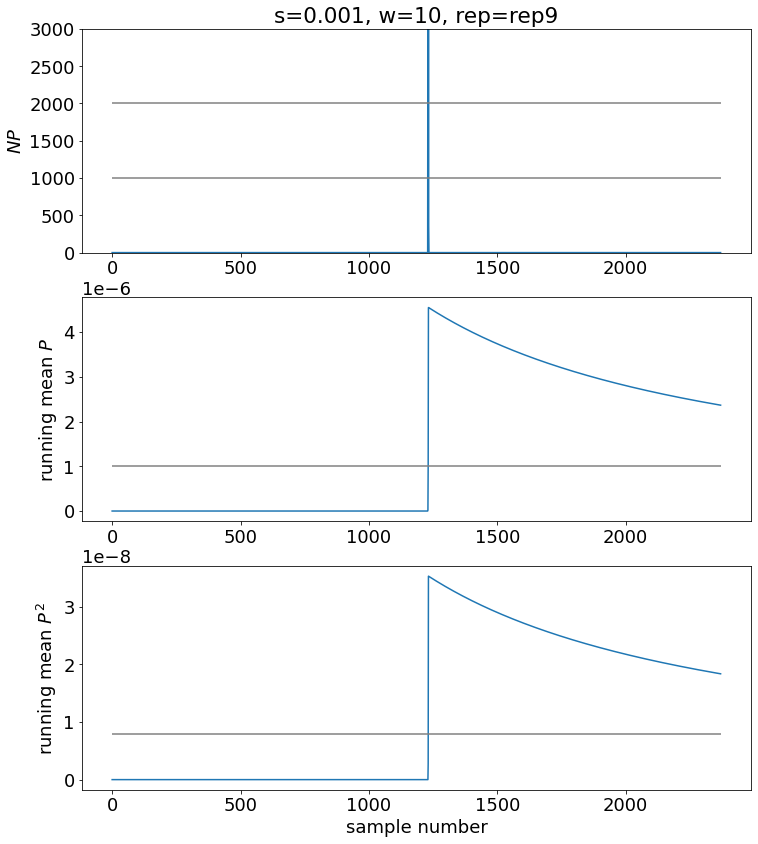

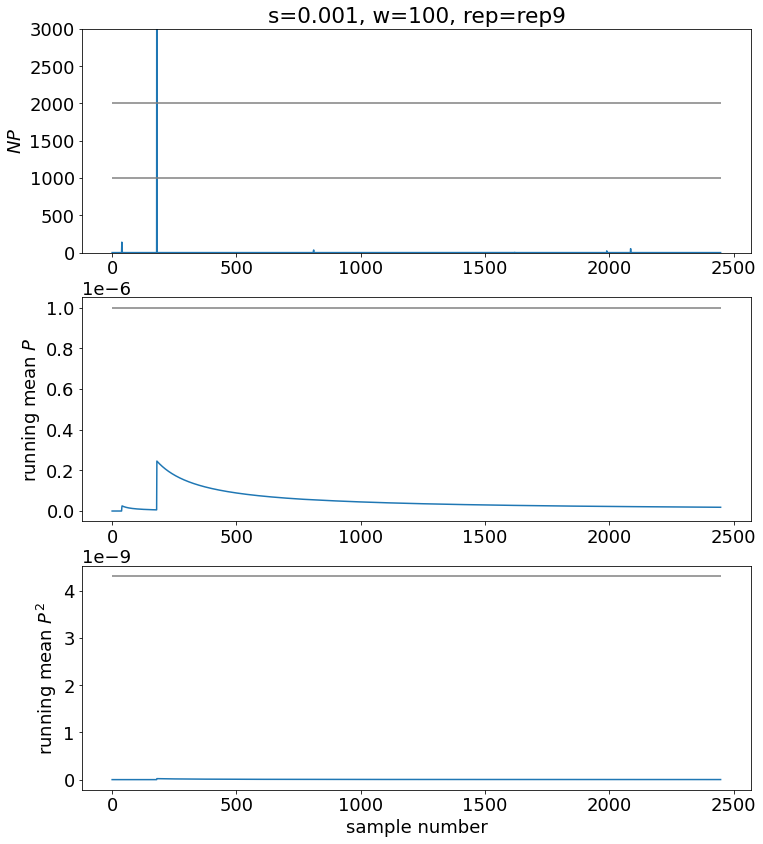

In [49]:
## Gaussian

# Uniform

L = 10000
rho = 1
N = rho * L**2
mu = 1e-9
print(f"N mu = {N * mu}")
prefix = "../results/gaussian_w{w}/s{s}_mu{mu}/s{s}_mu{mu}_rho{rho}_L{L}_sigma10_time50000.0_r0.1_gaussian_w{w}_{rep}"
w_vals = [10,100]
for s in [0.1, 0.01, 0.001]:
    for rep in [f"rep{i}" for i in range(10)]:
        for w in w_vals:
            pfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep, w=w) + ".p"
            zfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep, w=w) + ".zero"

            ps = np.loadtxt(pfile)
            zeros = np.loadtxt(zfile)
            n_samples = np.arange(1, len(ps) + 1)
            n_zeros = zeros * n_samples / n_samples[-1]

            if rep == "all":
                print(f"s = {s}")
                print(f"mu / s = {mu / s}")
                print(f"E[P] = {np.sum(ps) / (len(ps) + n_zeros)}")

            plt.figure(figsize=(12,14))
            plt.subplot(311)
            plt.plot(N*ps)
            plt.hlines([1 / s, 2 / s], 0, len(ps), color="0.5")
            plt.ylabel("$NP$")
            plt.ylim([0, 3/s])
            plt.title(f"s={s}, w={w}, rep={rep}")
            plt.subplot(312)
            plt.plot(np.cumsum(ps) / (n_samples + n_zeros))
            plt.hlines(mu / s, 0, n_samples[-1], color="0.5")
            plt.ylabel("running mean $P$")
            plt.subplot(313)
            plt.plot(np.cumsum(ps**2) / (n_samples + n_zeros))
            
            sigma = 10
            rho = 1
            w_tilde = w/np.sqrt(get_lc_squared(sigma,s))
            theory_u2 = u2_exact(w_tilde)
            theory_EP2 = get_EPsquared(mu,s,rho,sigma,theory_u2)
            plt.hlines(theory_EP2, 0, n_samples[-1], color="0.5")
            plt.ylabel("running mean $P^2$")
            plt.xlabel("sample number")
            plt.show()
#         plt.savefig(f"example_plots/example_s{s}_{rep}.png")
#         plt.close()